<a href="https://colab.research.google.com/github/datamongerbonny/geopy-notebooks/blob/main/08_datacleaningPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MISSINGNO



Download data here: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [33]:
import numpy as np
import pandas as pd

In [51]:
# smaller version of NYPD Complaint Data (only for year 2020)
NYPD = pd.read_csv("./content/NYPD_Complaint_Data_Historic_2020.csv")

In [52]:
NYPD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413391 entries, 0 to 413390
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         413391 non-null  object 
 1   CMPLNT_FR_DT       413391 non-null  object 
 2   CMPLNT_FR_TM       413391 non-null  object 
 3   CMPLNT_TO_DT       374435 non-null  object 
 4   CMPLNT_TO_TM       413391 non-null  object 
 5   ADDR_PCT_CD        413391 non-null  int64  
 6   RPT_DT             413391 non-null  object 
 7   KY_CD              413391 non-null  int64  
 8   OFNS_DESC          413391 non-null  object 
 9   PD_CD              412944 non-null  float64
 10  PD_DESC            413391 non-null  object 
 11  CRM_ATPT_CPTD_CD   413391 non-null  object 
 12  LAW_CAT_CD         413391 non-null  object 
 13  BORO_NM            413391 non-null  object 
 14  LOC_OF_OCCUR_DESC  413391 non-null  object 
 15  PREM_TYP_DESC      413391 non-null  object 
 16  JU

In [44]:
NYPD.describe()

CMPLNT_NUM   ADDR_PCT_CD         KY_CD         PD_CD  \
count  7.825499e+06  7.823333e+06  7.825499e+06  7.818738e+06   
mean   5.500321e+08  6.334306e+01  2.968756e+02  4.126822e+02   
std    2.597822e+08  3.450825e+01  1.511127e+02  2.176568e+02   
min    1.000001e+08  1.000000e+00  1.010000e+02  1.000000e+02   
25%    3.250977e+08  4.000000e+01  1.170000e+02  2.540000e+02   
50%    5.500406e+08  6.300000e+01  3.410000e+02  3.800000e+02   
75%    7.750019e+08  9.400000e+01  3.510000e+02  6.370000e+02   
max    9.999999e+08  1.230000e+02  8.810000e+02  9.750000e+02   

       JURISDICTION_CODE  TRANSIT_DISTRICT      Latitude     Longitude  
count       7.818738e+06     172475.000000  7.808160e+06  7.808160e+06  
mean        7.088369e-01         13.605833  4.073517e+01 -7.392551e+01  
std         6.648380e+00         12.475836  8.609054e-02  7.825796e-02  
min         0.000000e+00          1.000000  4.011271e+01 -7.751921e+01  
25%         0.000000e+00          3.000000  4.067280e+01 -7.397287e+01  
50%         0.000000e+00         11.000000  4.073236e+01 -7.392721e+01  
75%         0.000000e+00         30.000000  4.081215e+01 -7.388291e+01  
max         9.700000e+01         34.000000  5.965727e+01 -7.368479e+01

In [45]:
NYPD.shape

(7825499, 35)

In [70]:
NYPD = pd.read_csv('./content/NYPD_Complaint_Data_Historic.csv',
                   parse_dates=['CMPLNT_FR_TM'])
NYPD.dtypes.head()

C:\Users\ruihi\AppData\Local\Temp\ipykernel_10508\3264768284.py:1: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  NYPD = pd.read_csv('./content/NYPD_Complaint_Data_Historic.csv',
C:\Users\ruihi\AppData\Local\Temp\ipykernel_10508\3264768284.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  NYPD = pd.read_csv('./content/NYPD_Complaint_Data_Historic.csv',


CMPLNT_NUM               int64
CMPLNT_FR_DT            object
CMPLNT_FR_TM    datetime64[ns]
CMPLNT_TO_DT            object
CMPLNT_TO_TM            object
dtype: object

In [54]:
NYPD.head()

CMPLNT_NUM CMPLNT_FR_DT        CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0   506547392   03/29/2018 2023-08-05 20:30:00          NaN          NaN   
1   629632833   02/06/2018 2023-08-05 23:15:00          NaN          NaN   
2   787203902   11/21/2018 2023-08-05 00:15:00   11/21/2018     00:20:00   
3   280364018   06/09/2018 2023-08-05 21:42:00   06/09/2018     21:43:00   
4   985800320   11/10/2018 2023-08-05 19:40:00   11/10/2018     19:45:00   

   ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  PD_CD  ...  \
0         32.0  03/30/2018    351  CRIMINAL MISCHIEF & RELATED OF  254.0  ...   
1         52.0  02/07/2018    341                   PETIT LARCENY  333.0  ...   
2         75.0  11/21/2018    341                   PETIT LARCENY  321.0  ...   
3         10.0  06/10/2018    361   OFF. AGNST PUB ORD SENSBLTY &  639.0  ...   
4         19.0  11/10/2018    341                   PETIT LARCENY  333.0  ...   

  SUSP_SEX TRANSIT_DISTRICT   Latitude  Longitude  \
0      NaN              NaN  40.810877 -73.941064   
1        F              NaN  40.873671 -73.908014   
2        F              NaN  40.651782 -73.885457   
3        M              NaN  40.759310 -73.994706   
4        F              NaN  40.764536 -73.970728   

                         Lat_Lon              PATROL_BORO STATION_NAME  \
0  (40.810877241, -73.941064151)    PATROL BORO MAN NORTH          NaN   
1  (40.873671035, -73.908013649)        PATROL BORO BRONX          NaN   
2  (40.651782232, -73.885456761)  PATROL BORO BKLYN NORTH          NaN   
3  (40.759310399, -73.994706072)    PATROL BORO MAN SOUTH          NaN   
4  (40.764535539, -73.970728388)    PATROL BORO MAN NORTH          NaN   

   VIC_AGE_GROUP        VIC_RACE VIC_SEX  
0          25-44           WHITE       F  
1        UNKNOWN         UNKNOWN       D  
2        UNKNOWN         UNKNOWN       D  
3          18-24  WHITE HISPANIC       F  
4        UNKNOWN         UNKNOWN       D  

[5 rows x 35 columns]

In [55]:
NYPD = NYPD.drop(columns=['CMPLNT_TO_DT',  'PARKS_NM', 
                'HADEVELOPT', 'HOUSING_PSA'])

In [56]:
NYPD.head()

CMPLNT_NUM CMPLNT_FR_DT        CMPLNT_FR_TM CMPLNT_TO_TM  ADDR_PCT_CD  \
0   506547392   03/29/2018 2023-08-05 20:30:00          NaN         32.0   
1   629632833   02/06/2018 2023-08-05 23:15:00          NaN         52.0   
2   787203902   11/21/2018 2023-08-05 00:15:00     00:20:00         75.0   
3   280364018   06/09/2018 2023-08-05 21:42:00     21:43:00         10.0   
4   985800320   11/10/2018 2023-08-05 19:40:00     19:45:00         19.0   

       RPT_DT  KY_CD                       OFNS_DESC  PD_CD  \
0  03/30/2018    351  CRIMINAL MISCHIEF & RELATED OF  254.0   
1  02/07/2018    341                   PETIT LARCENY  333.0   
2  11/21/2018    341                   PETIT LARCENY  321.0   
3  06/10/2018    361   OFF. AGNST PUB ORD SENSBLTY &  639.0   
4  11/10/2018    341                   PETIT LARCENY  333.0   

                          PD_DESC  ... SUSP_SEX TRANSIT_DISTRICT   Latitude  \
0  MISCHIEF, CRIMINAL 4, OF MOTOR  ...      NaN              NaN  40.810877   
1  LARCENY,PETIT FROM STORE-SHOPL  ...        F              NaN  40.873671   
2         LARCENY,PETIT FROM AUTO  ...        F              NaN  40.651782   
3         AGGRAVATED HARASSMENT 2  ...        M              NaN  40.759310   
4  LARCENY,PETIT FROM STORE-SHOPL  ...        F              NaN  40.764536   

   Longitude                        Lat_Lon              PATROL_BORO  \
0 -73.941064  (40.810877241, -73.941064151)    PATROL BORO MAN NORTH   
1 -73.908014  (40.873671035, -73.908013649)        PATROL BORO BRONX   
2 -73.885457  (40.651782232, -73.885456761)  PATROL BORO BKLYN NORTH   
3 -73.994706  (40.759310399, -73.994706072)    PATROL BORO MAN SOUTH   
4 -73.970728  (40.764535539, -73.970728388)    PATROL BORO MAN NORTH   

   STATION_NAME VIC_AGE_GROUP        VIC_RACE VIC_SEX  
0           NaN         25-44           WHITE       F  
1           NaN       UNKNOWN         UNKNOWN       D  
2           NaN       UNKNOWN         UNKNOWN       D  
3           NaN         18-24  WHITE HISPANIC       F  
4           NaN       UNKNOWN         UNKNOWN       D  

[5 rows x 31 columns]

In [57]:
NYPD.describe()

CMPLNT_NUM                CMPLNT_FR_TM   ADDR_PCT_CD         KY_CD  \
count  7.825499e+06                     7825451  7.823333e+06  7.825499e+06   
mean   5.500321e+08  2023-08-05 13:32:22.777216  6.334306e+01  2.968756e+02   
min    1.000001e+08         2023-08-05 00:00:00  1.000000e+00  1.010000e+02   
25%    3.250977e+08         2023-08-05 09:00:00  4.000000e+01  1.170000e+02   
50%    5.500406e+08         2023-08-05 14:40:00  6.300000e+01  3.410000e+02   
75%    7.750019e+08         2023-08-05 19:00:00  9.400000e+01  3.510000e+02   
max    9.999999e+08         2023-08-05 23:59:00  1.230000e+02  8.810000e+02   
std    2.597822e+08                         NaN  3.450825e+01  1.511127e+02   

              PD_CD  JURISDICTION_CODE  TRANSIT_DISTRICT      Latitude  \
count  7.818738e+06       7.818738e+06     172475.000000  7.808160e+06   
mean   4.126822e+02       7.088369e-01         13.605833  4.073517e+01   
min    1.000000e+02       0.000000e+00          1.000000  4.011271e+01   
25%    2.540000e+02       0.000000e+00          3.000000  4.067280e+01   
50%    3.800000e+02       0.000000e+00         11.000000  4.073236e+01   
75%    6.370000e+02       0.000000e+00         30.000000  4.081215e+01   
max    9.750000e+02       9.700000e+01         34.000000  5.965727e+01   
std    2.176568e+02       6.648380e+00         12.475836  8.609054e-02   

          Longitude  
count  7.808160e+06  
mean  -7.392551e+01  
min   -7.751921e+01  
25%   -7.397287e+01  
50%   -7.392721e+01  
75%   -7.388291e+01  
max   -7.368479e+01  
std    7.825796e-02

In [60]:
NYPD['CMPLNT_FR_TM'].dt.hour.describe()

count    7.825451e+06
mean     1.321954e+01
std      6.635173e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.400000e+01
75%      1.900000e+01
max      2.300000e+01
Name: CMPLNT_FR_TM, dtype: float64

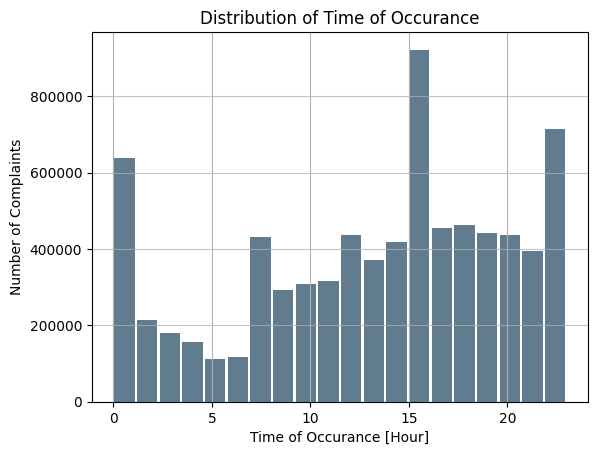

In [67]:
import matplotlib.pyplot as plt
Complaints = pd.Series(NYPD['CMPLNT_FR_TM'].dt.hour)
Complaints.plot.hist(grid=True, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Distribution of Time of Occurance')
plt.xlabel('Time of Occurance [Hour]')
plt.ylabel('Number of Complaints')
plt.grid(axis='y', alpha=0.75)

In [61]:
df_test = pd.read_csv("./content/NYPD_Complaint_Data_Historic.csv",
                      na_values = 'NaN')
print(df_test)

C:\Users\ruihi\AppData\Local\Temp\ipykernel_10508\2522930529.py:1: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv("./content/NYPD_Complaint_Data_Historic.csv",


         CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0         506547392   03/29/2018     20:30:00          NaN          NaN   
1         629632833   02/06/2018     23:15:00          NaN          NaN   
2         787203902   11/21/2018     00:15:00   11/21/2018     00:20:00   
3         280364018   06/09/2018     21:42:00   06/09/2018     21:43:00   
4         985800320   11/10/2018     19:40:00   11/10/2018     19:45:00   
...             ...          ...          ...          ...          ...   
7825494   104527061   05/01/2008     18:55:00   05/01/2018     19:00:00   
7825495   284201488   05/18/2018     14:50:00   05/18/2018     14:55:00   
7825496   808565901   11/19/2018     02:25:00   11/19/2018     02:30:00   
7825497   649441648   02/03/2018     10:02:00   02/03/2018     12:15:00   
7825498   803166404   01/05/2018     14:40:00   01/05/2018     16:00:00   

         ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  \
0               32.0  03

In [71]:
NYPD.isna().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1744294
CMPLNT_TO_TM         1739479
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18832
PD_CD                   6761
PD_DESC                 6761
CRM_ATPT_CPTD_CD         168
LAW_CAT_CD                 0
BORO_NM                12480
LOC_OF_OCCUR_DESC    1618063
PREM_TYP_DESC          42015
JURIS_DESC                 0
JURISDICTION_CODE       6761
PARKS_NM             7794644
HADEVELOPT           7477110
HOUSING_PSA          7226206
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4883369
SUSP_RACE            3514828
SUSP_SEX             3648142
TRANSIT_DISTRICT     7653024
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             7218
STATION_NAME         7653024
VIC_AGE_GROUP        1638445
VIC_RACE                 390
VIC_SEX       

In [72]:
NYPD.isna()

CMPLNT_NUM  CMPLNT_FR_DT  CMPLNT_FR_TM  CMPLNT_TO_DT  CMPLNT_TO_TM  \
0             False         False         False          True          True   
1             False         False         False          True          True   
2             False         False         False         False         False   
3             False         False         False         False         False   
4             False         False         False         False         False   
...             ...           ...           ...           ...           ...   
7825494       False         False         False         False         False   
7825495       False         False         False         False         False   
7825496       False         False         False         False         False   
7825497       False         False         False         False         False   
7825498       False         False         False         False         False   

         ADDR_PCT_CD  RPT_DT  KY_CD  OFNS_DESC  PD_CD  ...  SUSP_SEX  \
0              False   False  False      False  False  ...      True   
1              False   False  False      False  False  ...     False   
2              False   False  False      False  False  ...     False   
3              False   False  False      False  False  ...     False   
4              False   False  False      False  False  ...     False   
...              ...     ...    ...        ...    ...  ...       ...   
7825494        False   False  False      False  False  ...     False   
7825495        False   False  False      False  False  ...     False   
7825496        False   False  False      False  False  ...     False   
7825497        False   False  False      False  False  ...     False   
7825498        False   False  False      False  False  ...      True   

         TRANSIT_DISTRICT  Latitude  Longitude  Lat_Lon  PATROL_BORO  \
0                    True     False      False    False        False   
1                    True     False      False    False        False   
2                    True     False      False    False        False   
3                    True     False      False    False        False   
4                    True     False      False    False        False   
...                   ...       ...        ...      ...          ...   
7825494              True     False      False    False        False   
7825495              True     False      False    False        False   
7825496              True     False      False    False        False   
7825497              True     False      False    False        False   
7825498              True     False      False    False        False   

         STATION_NAME  VIC_AGE_GROUP  VIC_RACE  VIC_SEX  
0                True          False     False    False  
1                True          False     False    False  
2                True          False     False    False  
3                True          False     False    False  
4                True          False     False    False  
...               ...            ...       ...      ...  
7825494          True          False     False    False  
7825495          True          False     False    False  
7825496          True          False     False    False  
7825497          True          False     False    False  
7825498          True          False     False    False  

[7825499 rows x 35 columns]

<Axes: >

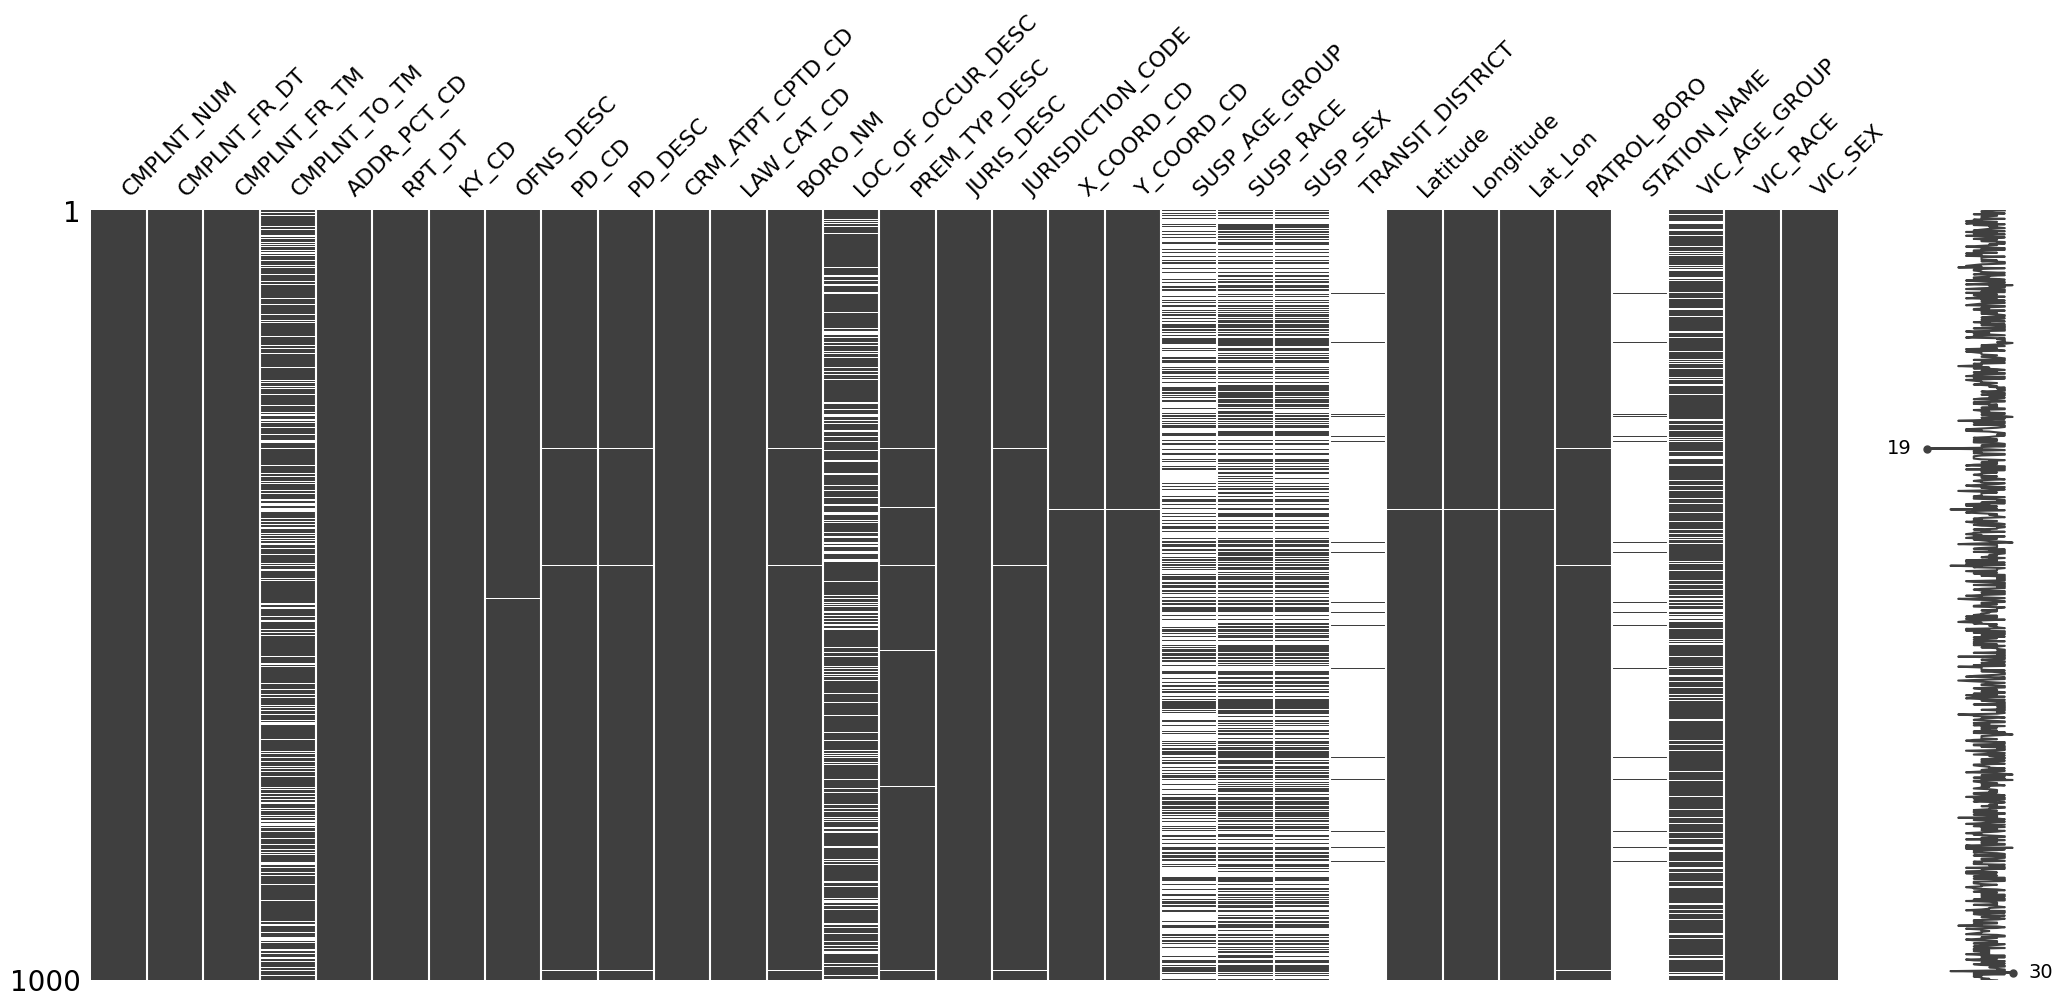

In [62]:
msno.matrix(NYPD.sample(1000))

<Axes: >

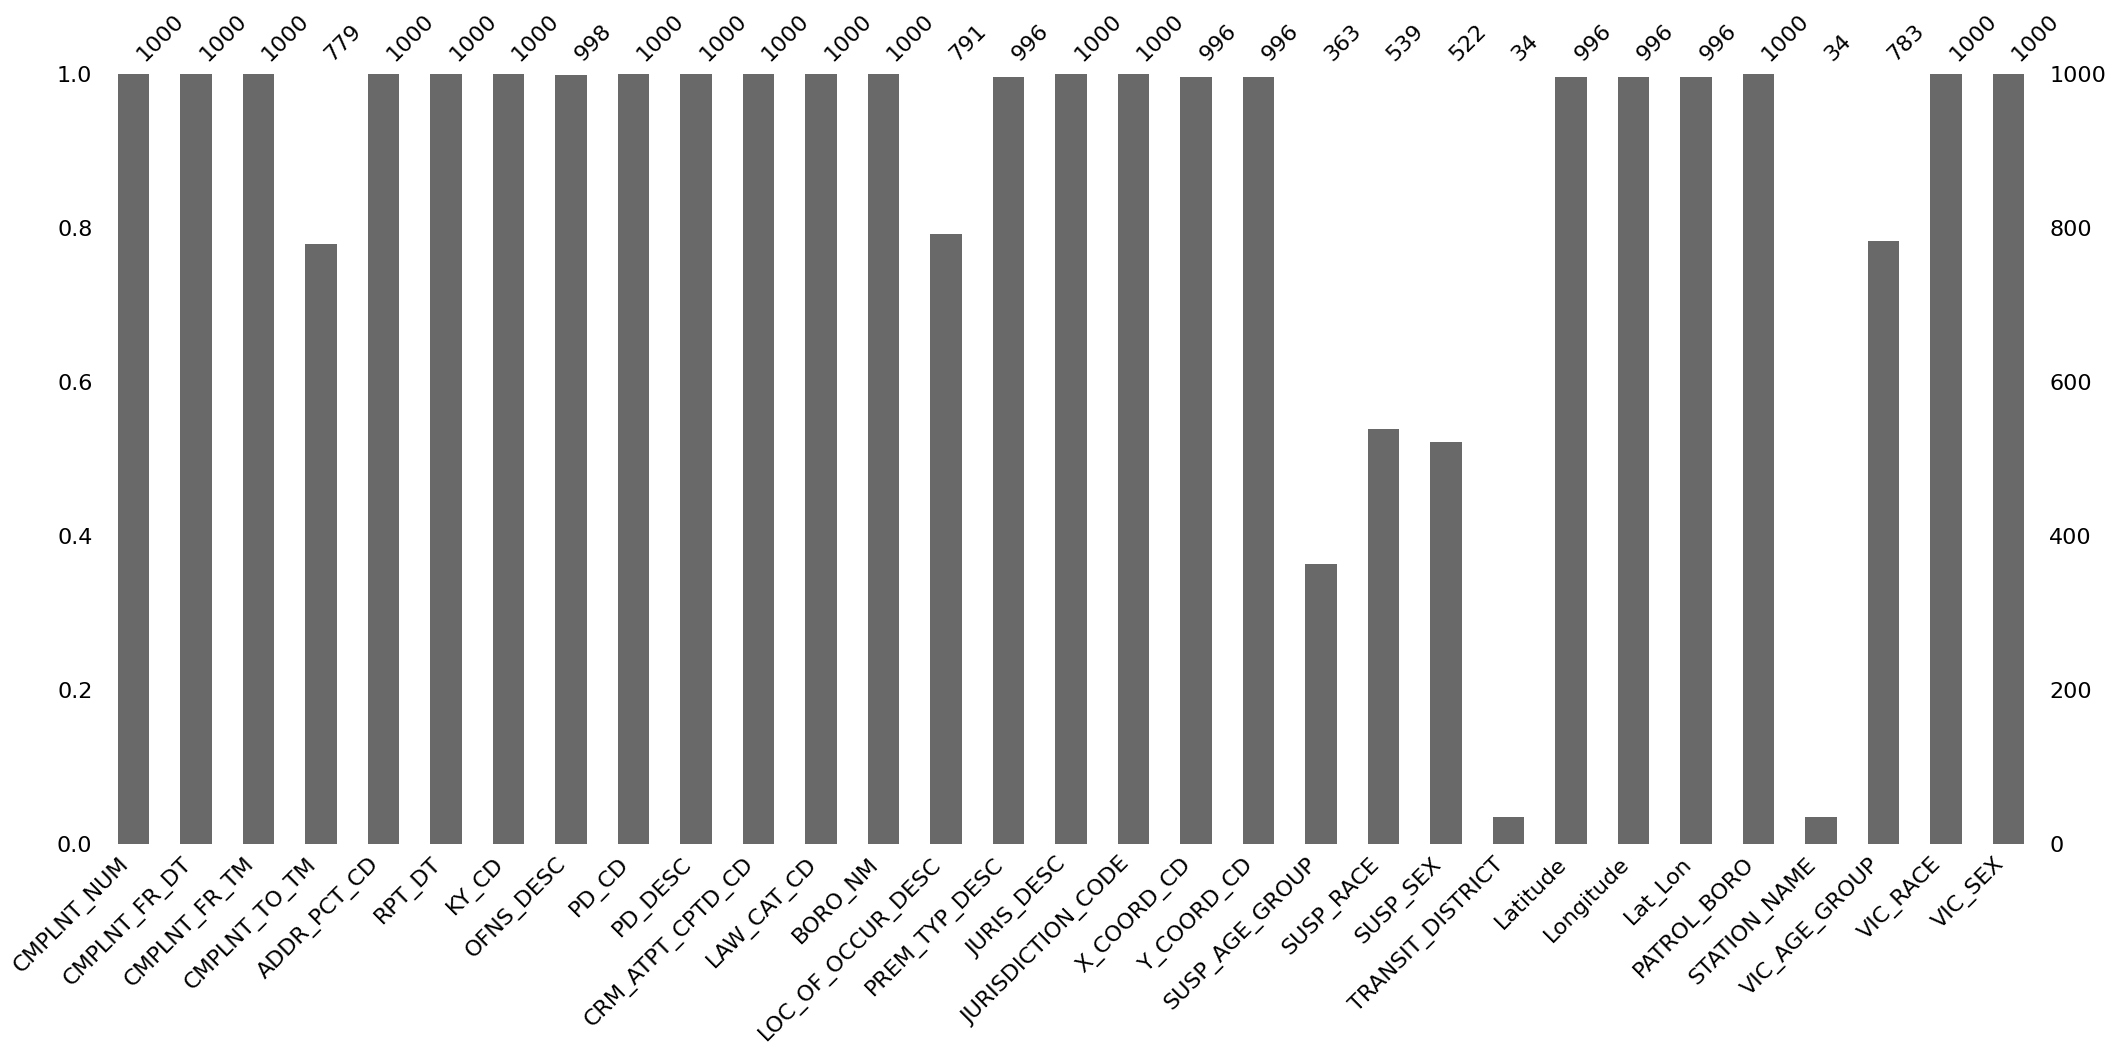

In [63]:
msno.bar(NYPD.sample(1000))

<Axes: >

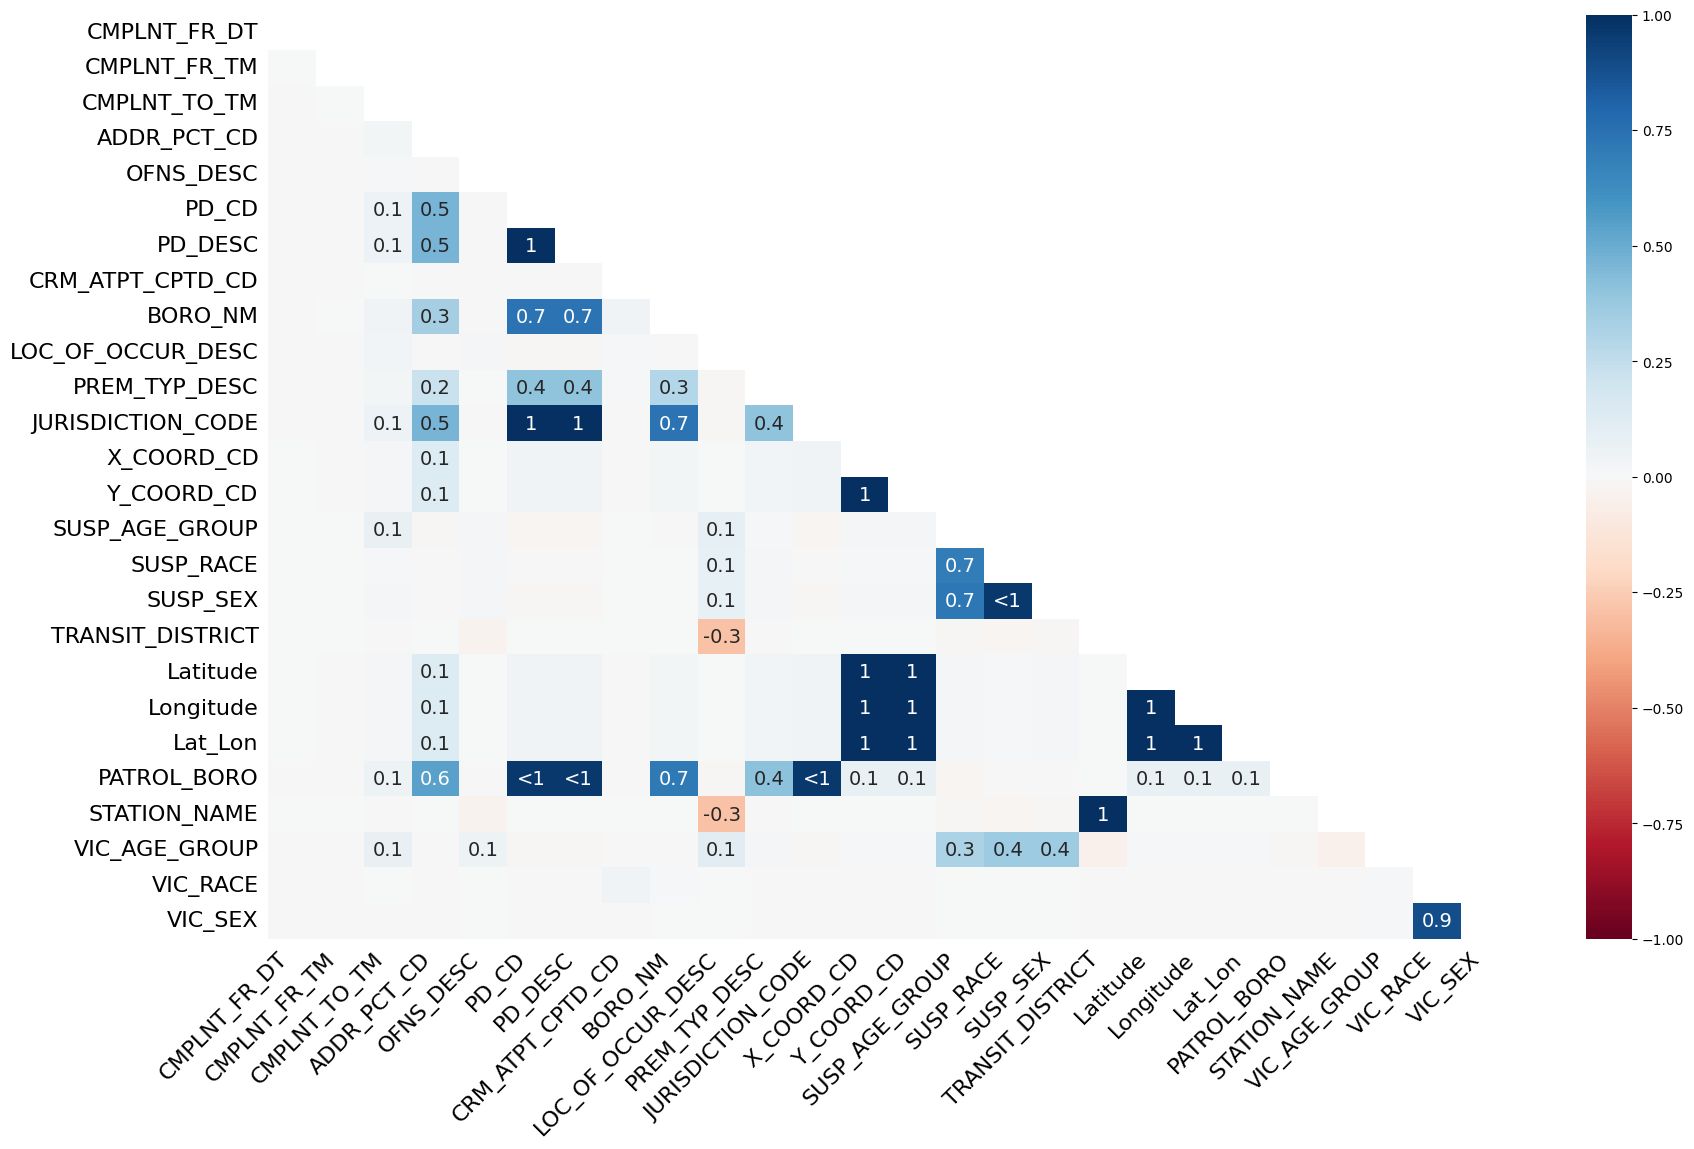

In [64]:
msno.heatmap(NYPD)

<Axes: >

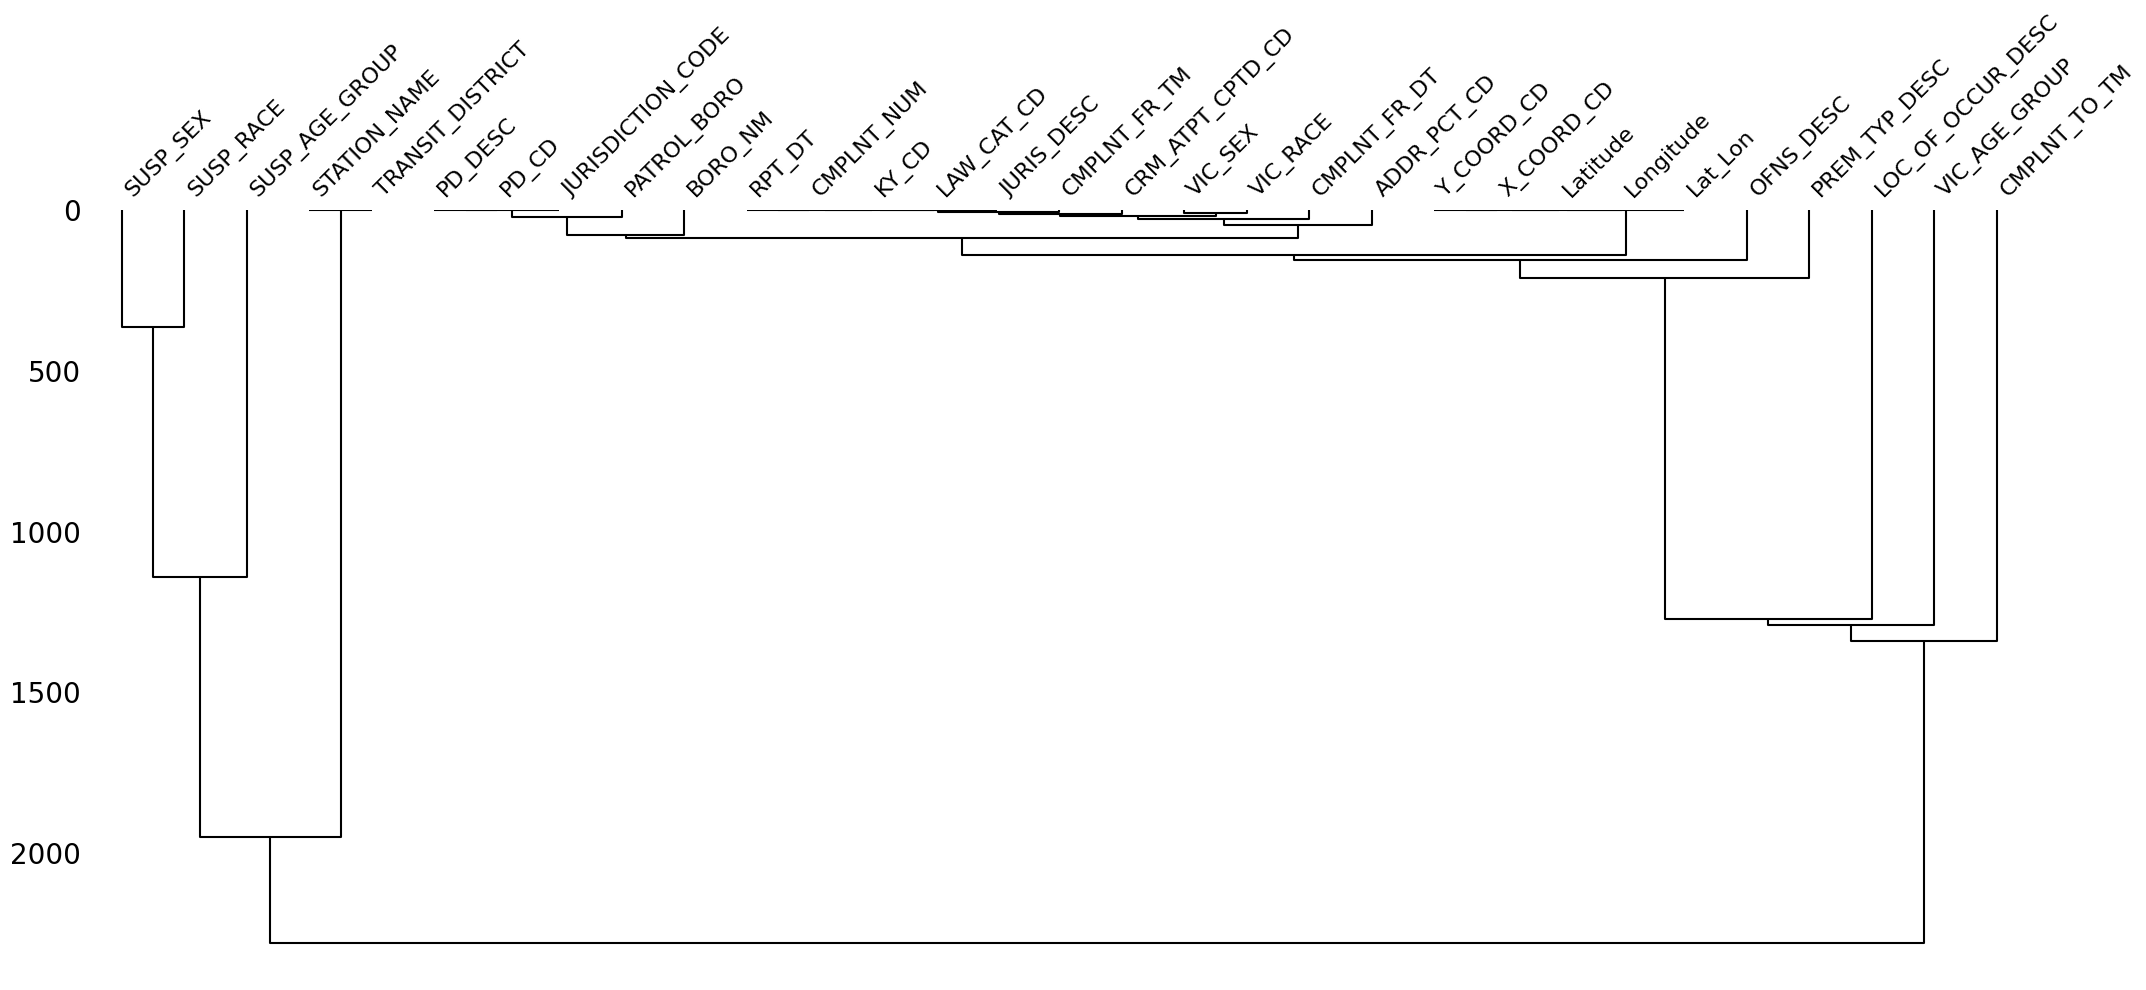

In [65]:
msno.dendrogram(NYPD)

Pandas
https://www.jesseajohnston.net/posts/2021/cleaning-transforming-data/


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./content/NYPD_Complaint_Data_Historic.csv")

C:\Users\ruihi\AppData\Local\Temp\ipykernel_30476\1570272625.py:1: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./content/NYPD_Complaint_Data_Historic.csv")


In [3]:
#!pip install geopandas

In [4]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
street_map = gpd.read_file('./content/tl_2021_36_place.shp')

In [5]:
# designate coordinate system
crs = {'init': 'epsg:4326'}
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

C:\tools\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


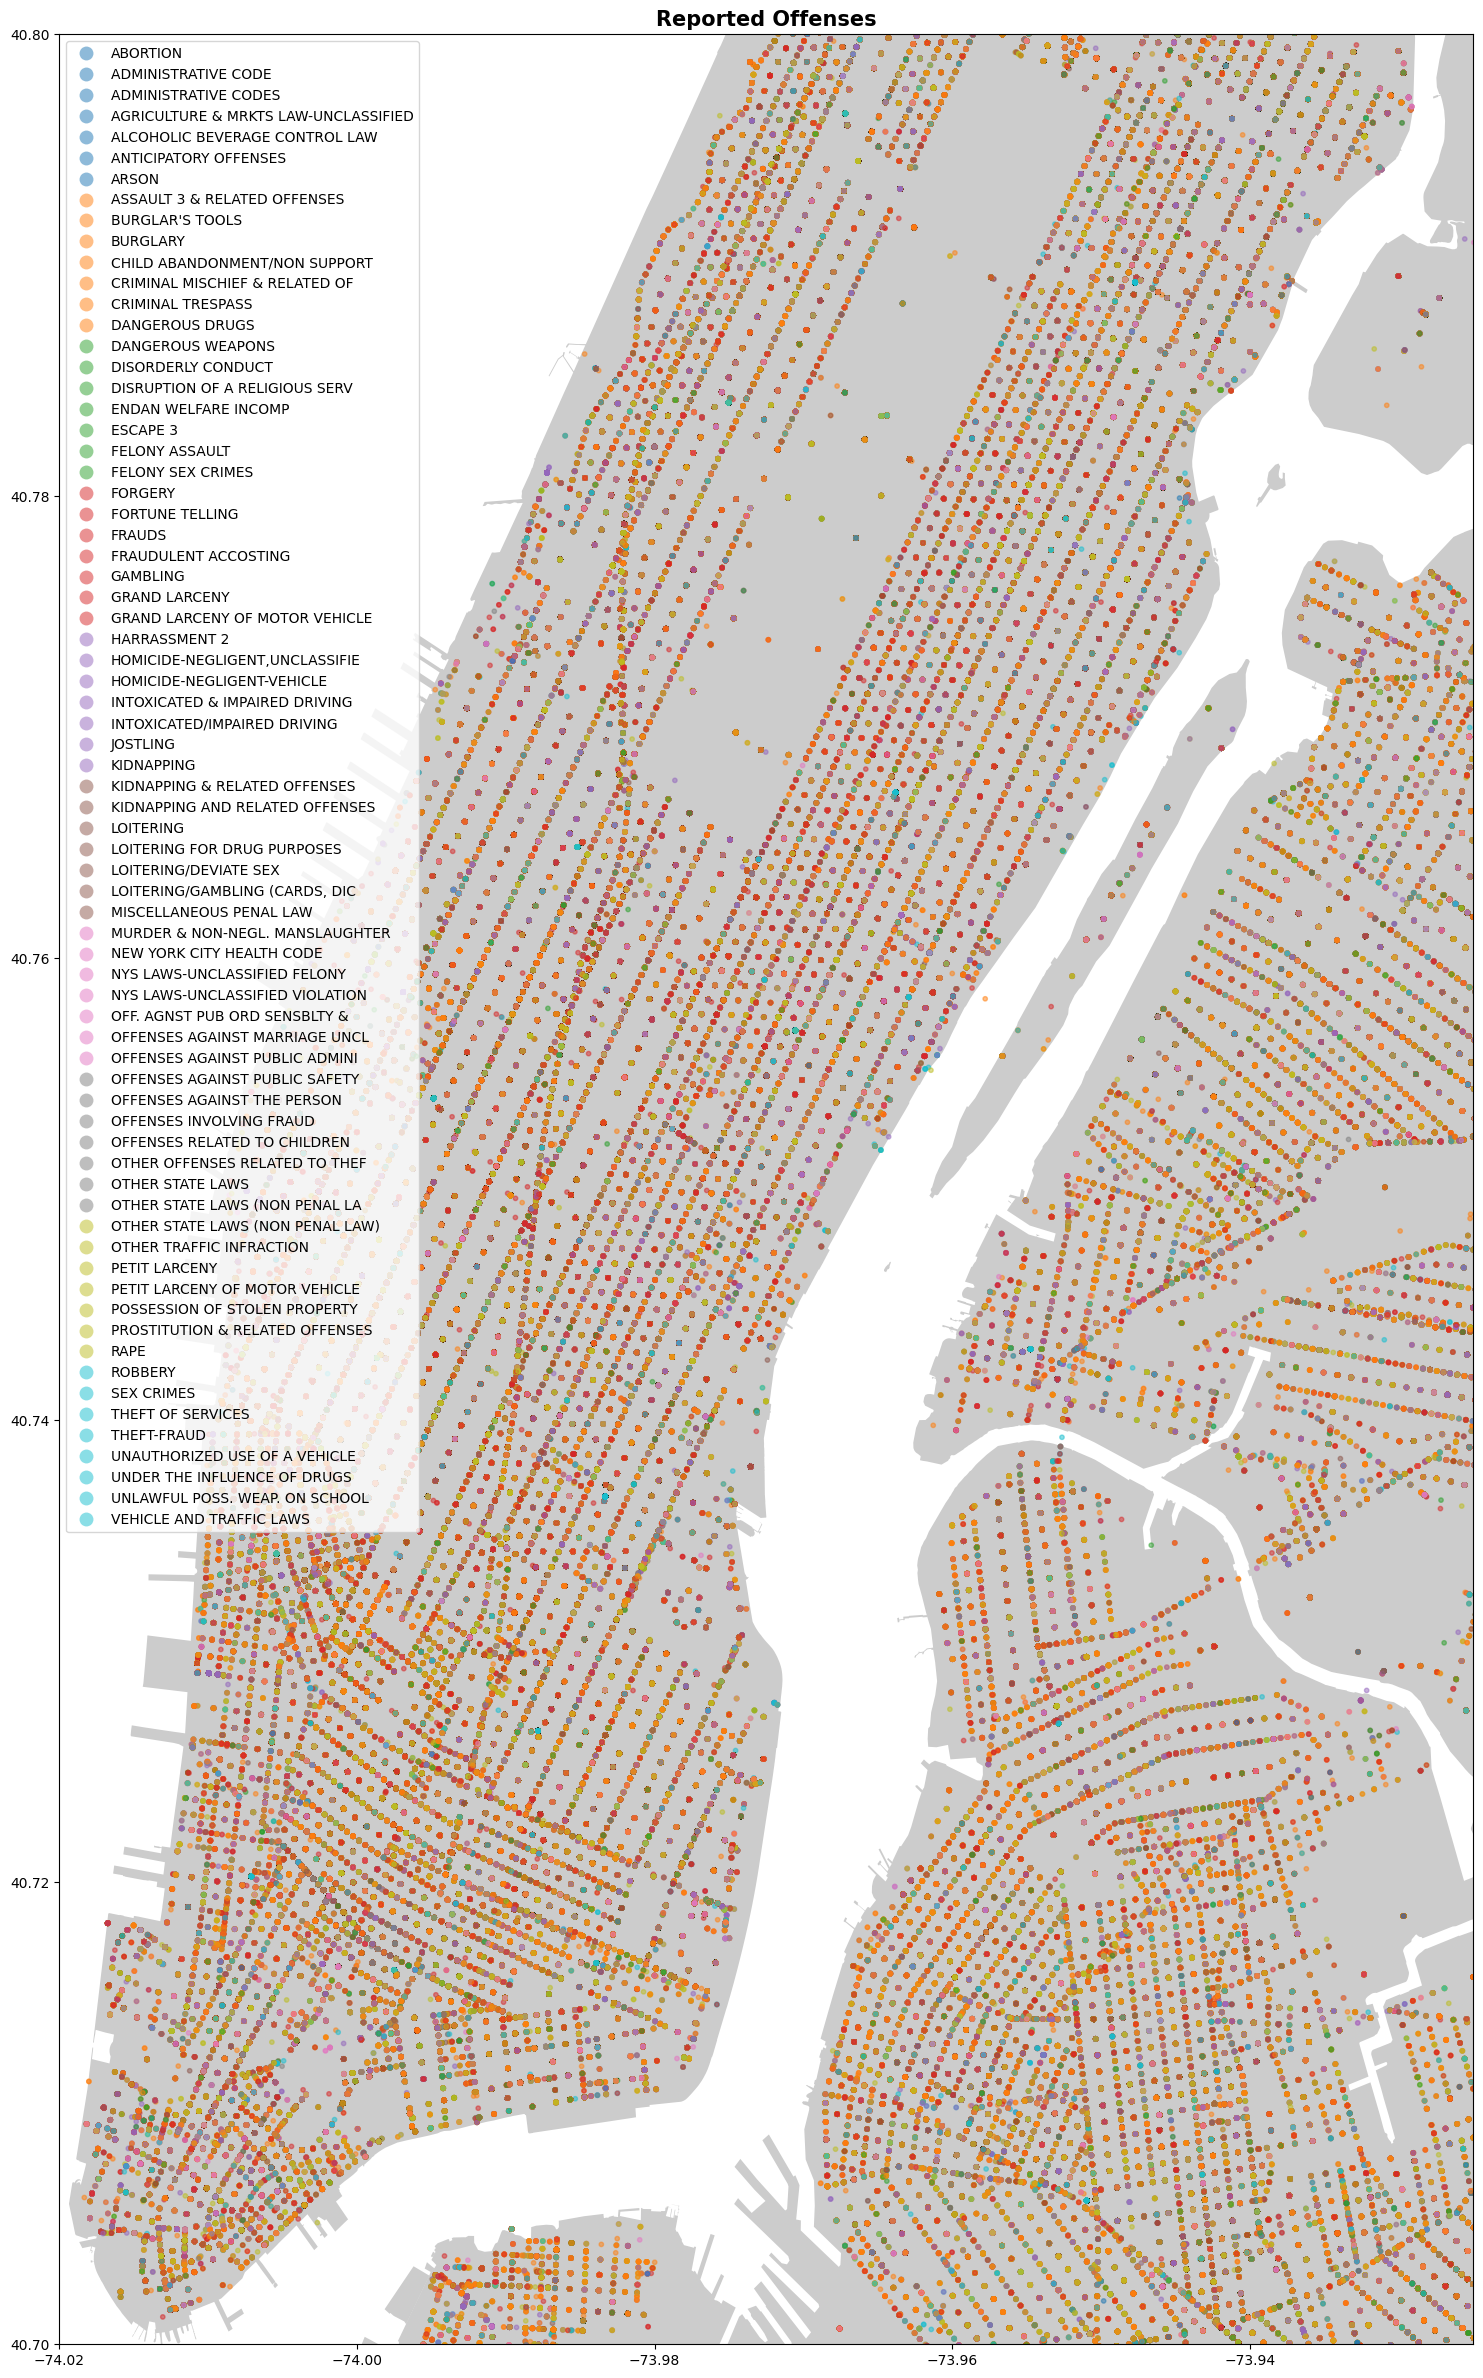

In [6]:
# create figure and define axes, assign to subplot (matplotlib)
fig, ax = plt.subplots(figsize=(30, 30))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4, color='grey')
# add geodataframe to axes
# assign 'OFNS_DESC' variable to represent coordinates on graph
# add legend
# make data points transparent using alpha
# assign size of points using markersize
geo_df.plot(column='OFNS_DESC', ax=ax, alpha=0.5, legend=True, markersize=10)
# add title to graph
plt.title('Reported Offenses', fontsize=15, fontweight='bold')
# set Latitude and Longitude boundaries for map display
plt.xlim(-74.02, -73.925)
plt.ylim( 40.7, 40.8)
# show map
plt.show()

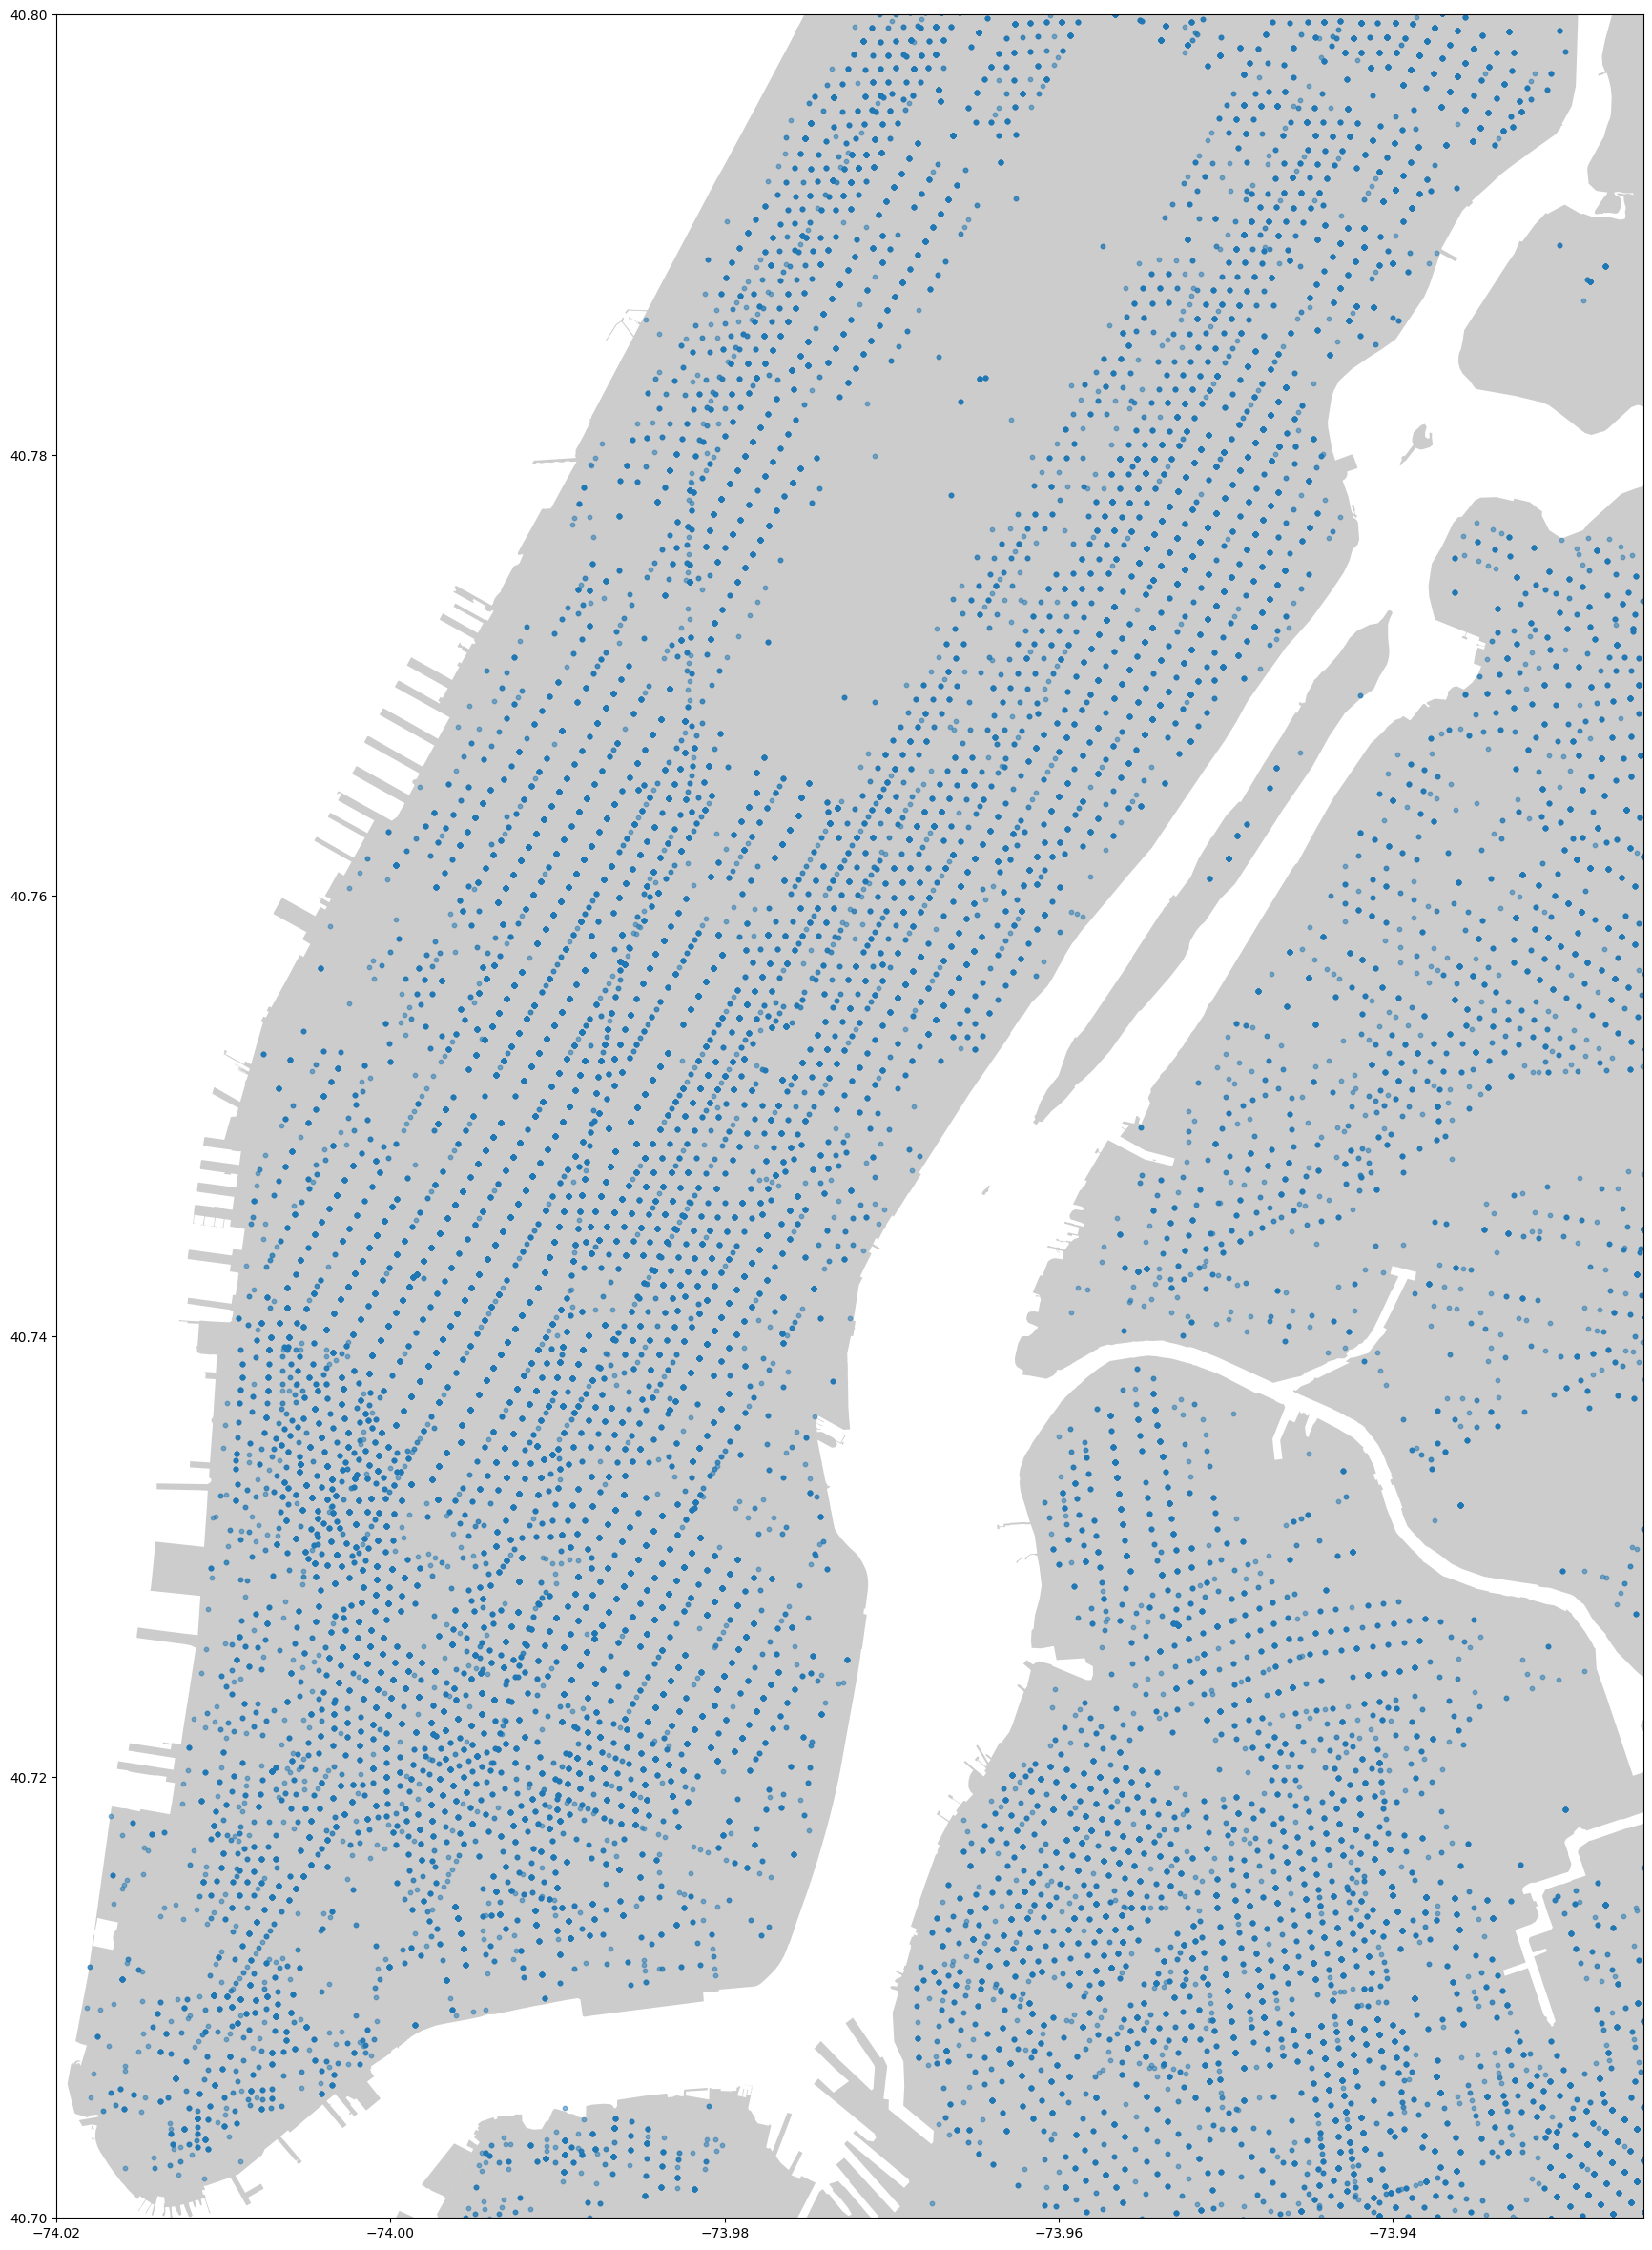

In [11]:
fig, ax = plt.subplots(figsize=(30, 30))
street_map.plot(ax=ax, alpha=0.4, color='grey')
dfc = geo_df.loc[df['OFNS_DESC'] == 'BURGLARY']
dfc.plot(ax=ax, alpha=0.5, markersize=10)
plt.xlim(-74.02, -73.925)
plt.ylim( 40.7, 40.8)
plt.show()

In [61]:
!pip install geojson
!pip install descartes
!pip install geopy

In [16]:
!pip install shapely

In [29]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# modules for mapping
from shapely.geometry import Point

# may use for additional visualization
import seaborn as sns

# modules for geocoding
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from time import sleep

In [41]:
NYPD = pd.read_csv("./content/NYPD_Complaint_Data_Historic.csv",
                   parse_dates=['CMPLNT_FR_TM'])

Data available here: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

In [13]:
collisions = pd.read_csv("./content/Motor_Vehicle_Collisions_-_Crashes.csv")

C:\Users\ruihi\AppData\Local\Temp\ipykernel_30476\3285068641.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions = pd.read_csv("./content/Motor_Vehicle_Collisions_-_Crashes.csv")


In [14]:
collisions.columns = collisions.columns.str.replace(' ','_')
print(collisions)

         CRASH_DATE CRASH_TIME    BOROUGH ZIP_CODE   LATITUDE  LONGITUDE  \
0        09/11/2021       2:39        NaN      NaN        NaN        NaN   
1        03/26/2022      11:45        NaN      NaN        NaN        NaN   
2        06/29/2022       6:55        NaN      NaN        NaN        NaN   
3        09/11/2021       9:35   BROOKLYN  11208.0  40.667202 -73.866500   
4        12/14/2021       8:13   BROOKLYN  11233.0  40.683304 -73.917274   
...             ...        ...        ...      ...        ...        ...   
2014464  07/03/2023      18:05        NaN      NaN  40.866806 -73.931010   
2014465  07/22/2023      21:39      BRONX  10457.0  40.844177 -73.902920   
2014466  07/02/2023      17:55  MANHATTAN  10006.0  40.711033 -74.014540   
2014467  07/22/2023      13:15     QUEENS  11433.0  40.691580 -73.793190   
2014468  07/22/2023       3:00     QUEENS  11433.0  40.700240 -73.792854   

                        LOCATION           ON_STREET_NAME CROSS_STREET_NAME  \
0       

In [15]:
collisions.head()

CRASH_DATE CRASH_TIME   BOROUGH ZIP_CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON_STREET_NAME CROSS_STREET_NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF_STREET_NAME  ...  CONTRIBUTING_FACTOR_VEHICLE_2  \
0                      NaN  ...                    Unspecified   
1                      NaN  ...                            NaN   
2                      NaN  ...                    Unspecified   
3  1211      LORING AVENUE  ...                            NaN   
4                      NaN  ...                            NaN   

   CONTRIBUTING_FACTOR_VEHICLE_3  CONTRIBUTING_FACTOR_VEHICLE_4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   CONTRIBUTING_FACTOR_VEHICLE_5  COLLISION_ID  VEHICLE_TYPE_CODE_1  \
0                            NaN       4455765                Sedan   
1                            NaN       4513547                Sedan   
2                            NaN       4541903                Sedan   
3                            NaN       4456314                Sedan   
4                            NaN       4486609                  NaN   

   VEHICLE_TYPE_CODE_2  VEHICLE_TYPE_CODE_3 VEHICLE_TYPE_CODE_4  \
0                Sedan                  NaN                 NaN   
1                  NaN                  NaN                 NaN   
2        Pick-up Truck                  NaN                 NaN   
3                  NaN                  NaN                 NaN   
4                  NaN                  NaN                 NaN   

  VEHICLE_TYPE_CODE_5  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

<Axes: >

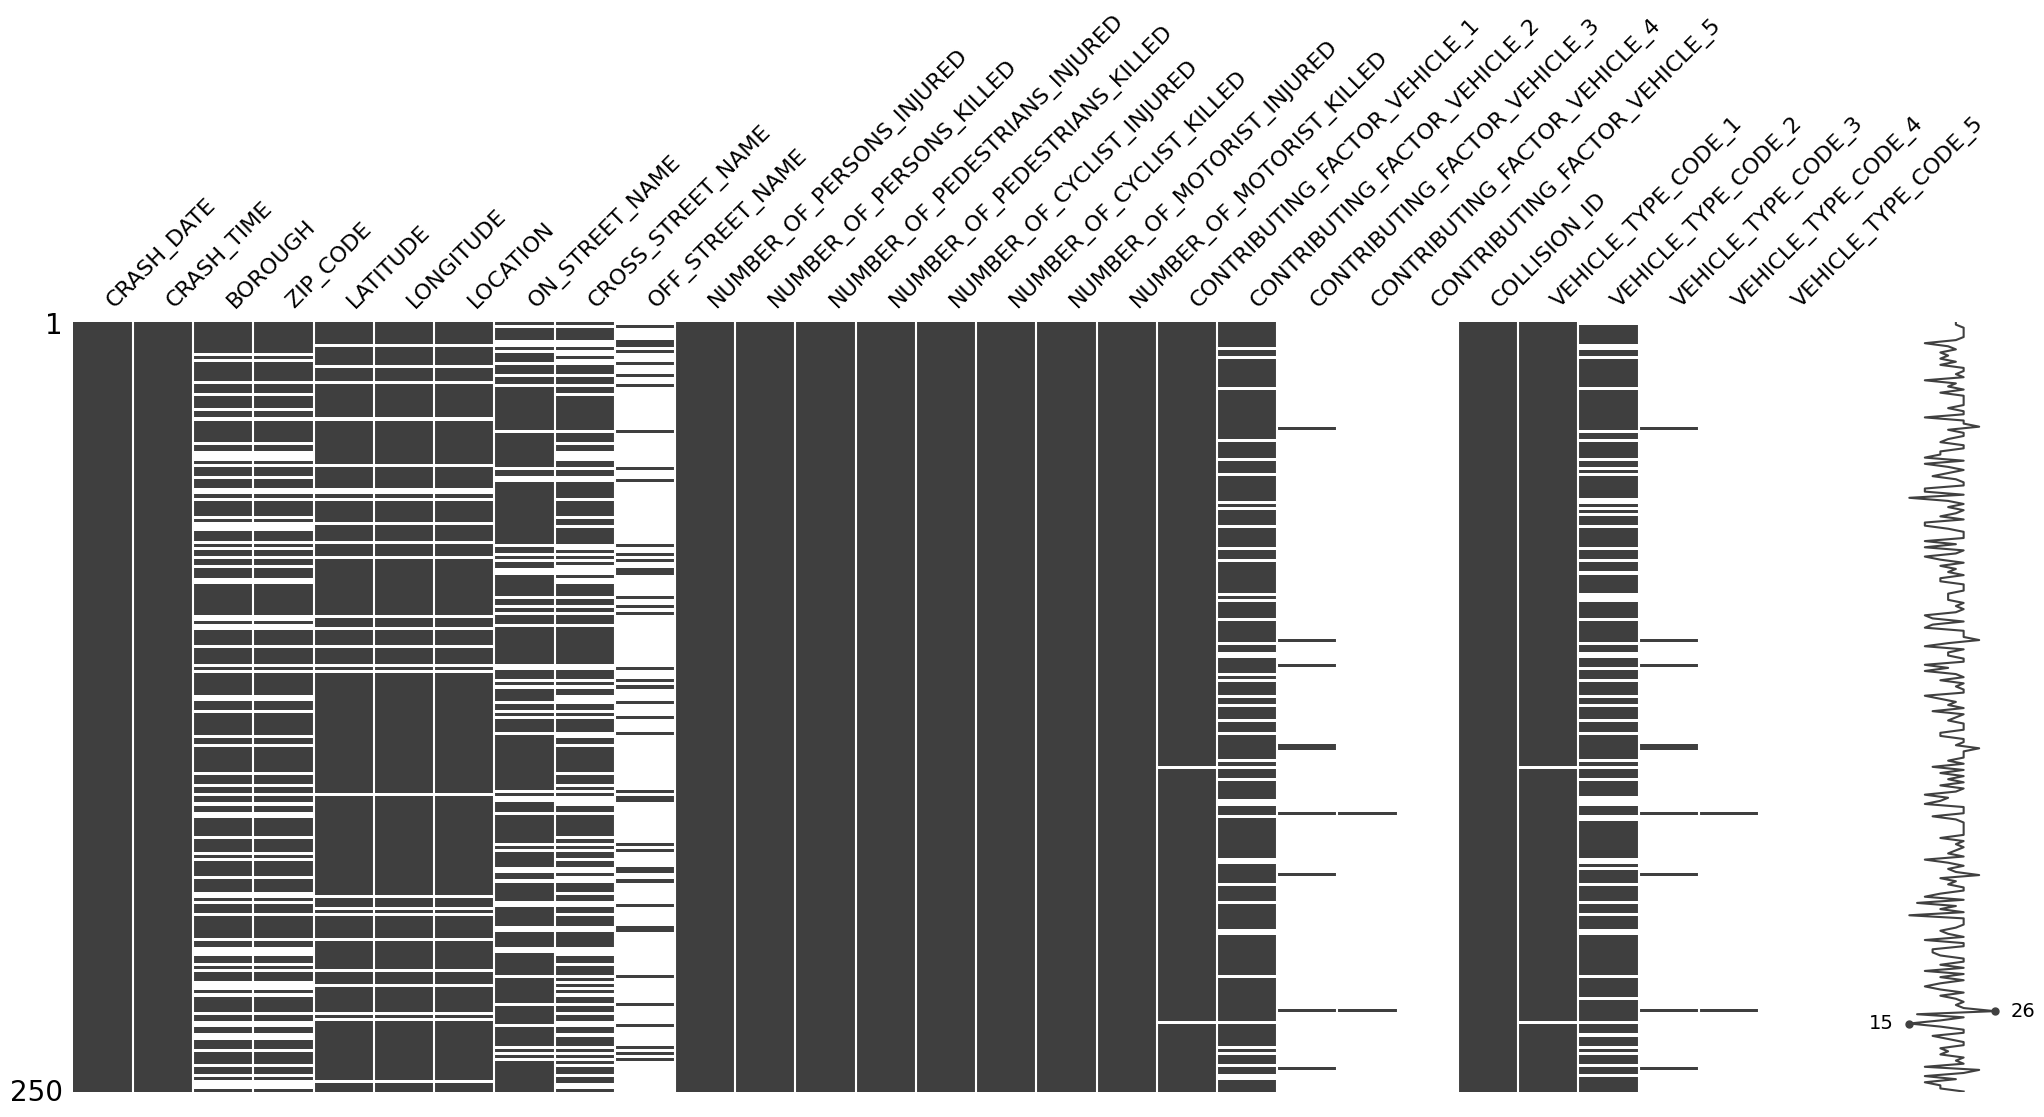

In [16]:
import missingno as msno
%matplotlib inline
msno.matrix(collisions.sample(250))

<Axes: >

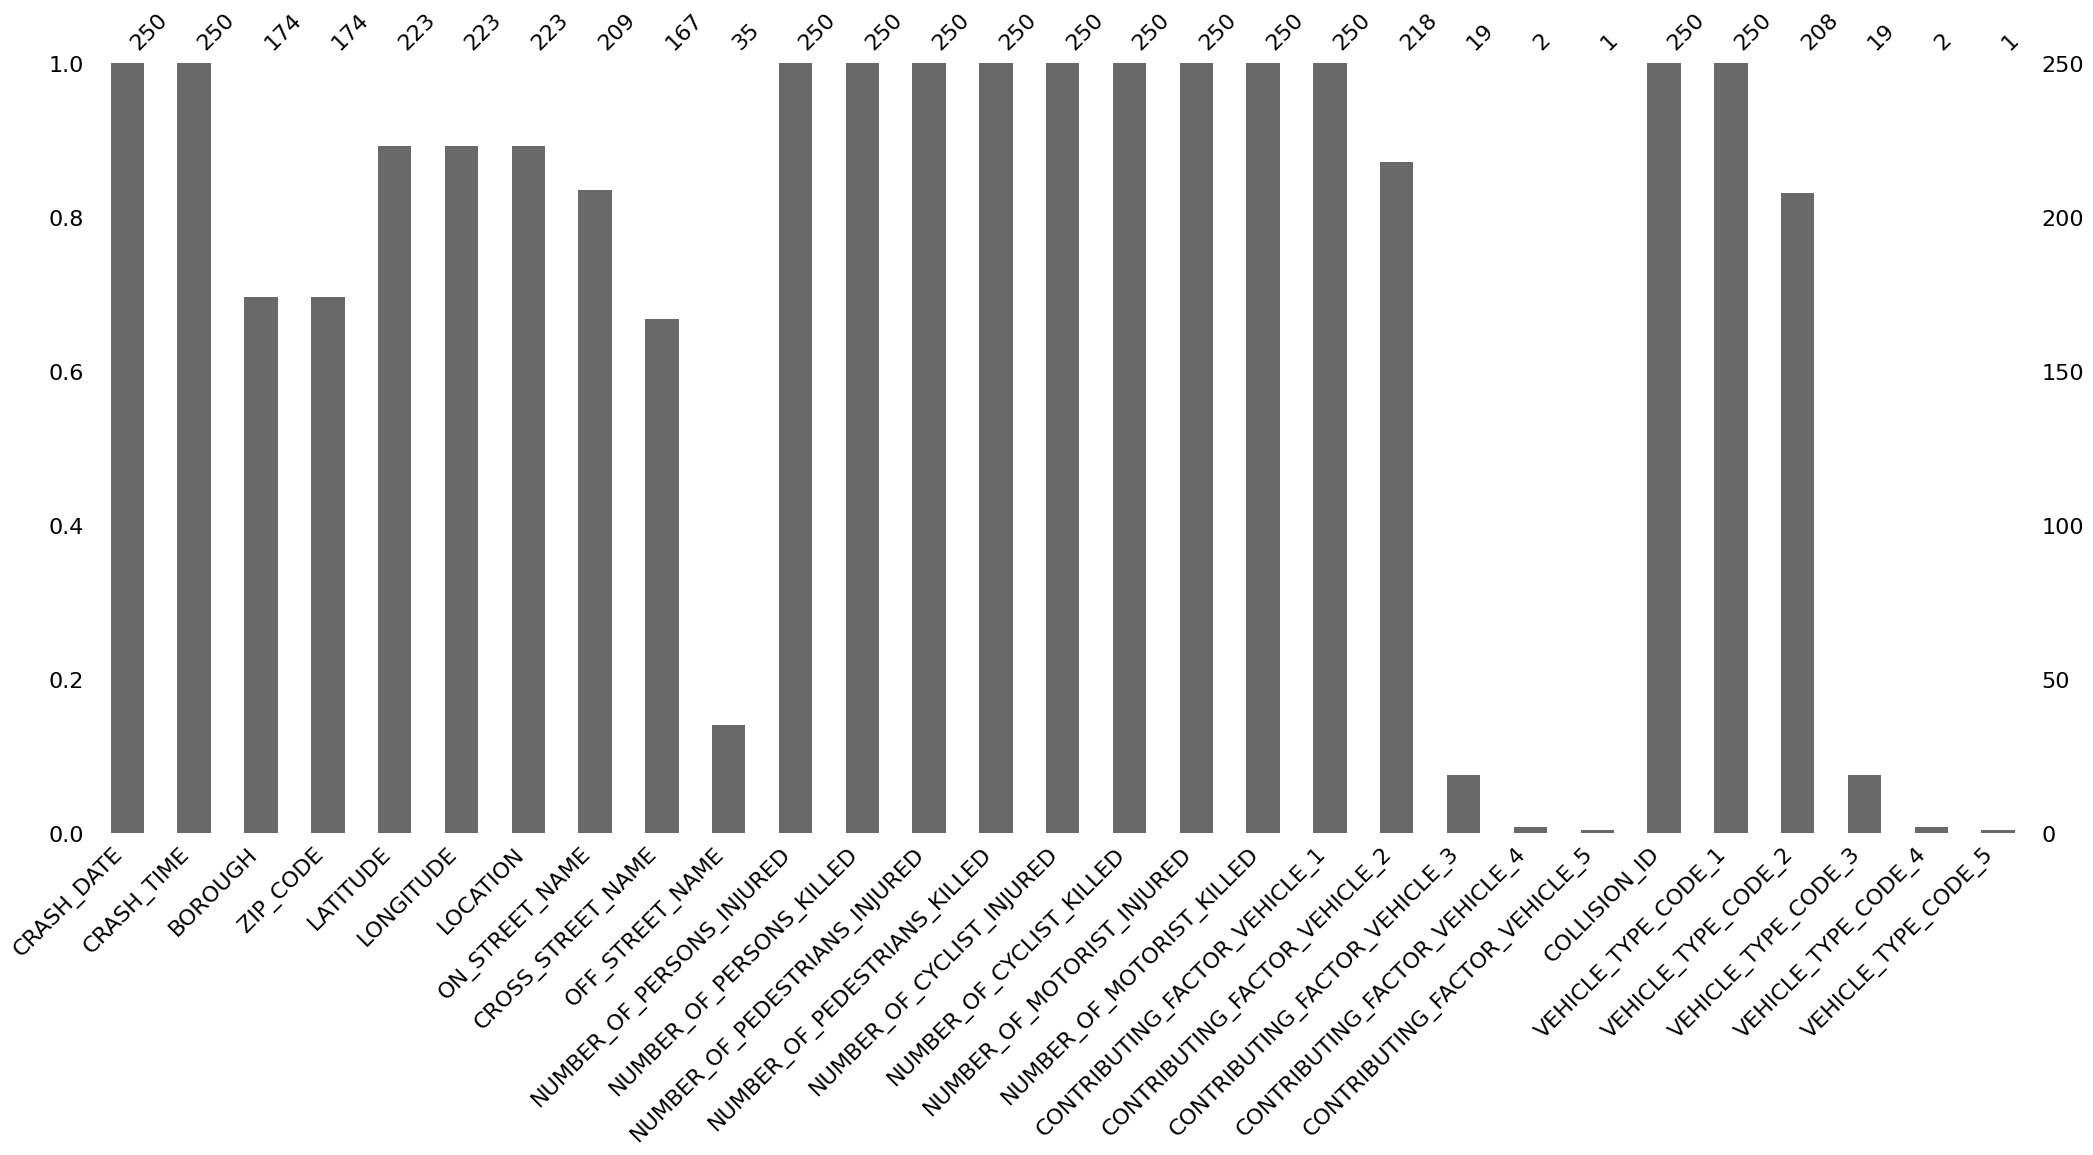

In [17]:
msno.bar(collisions.sample(250))

<Axes: >

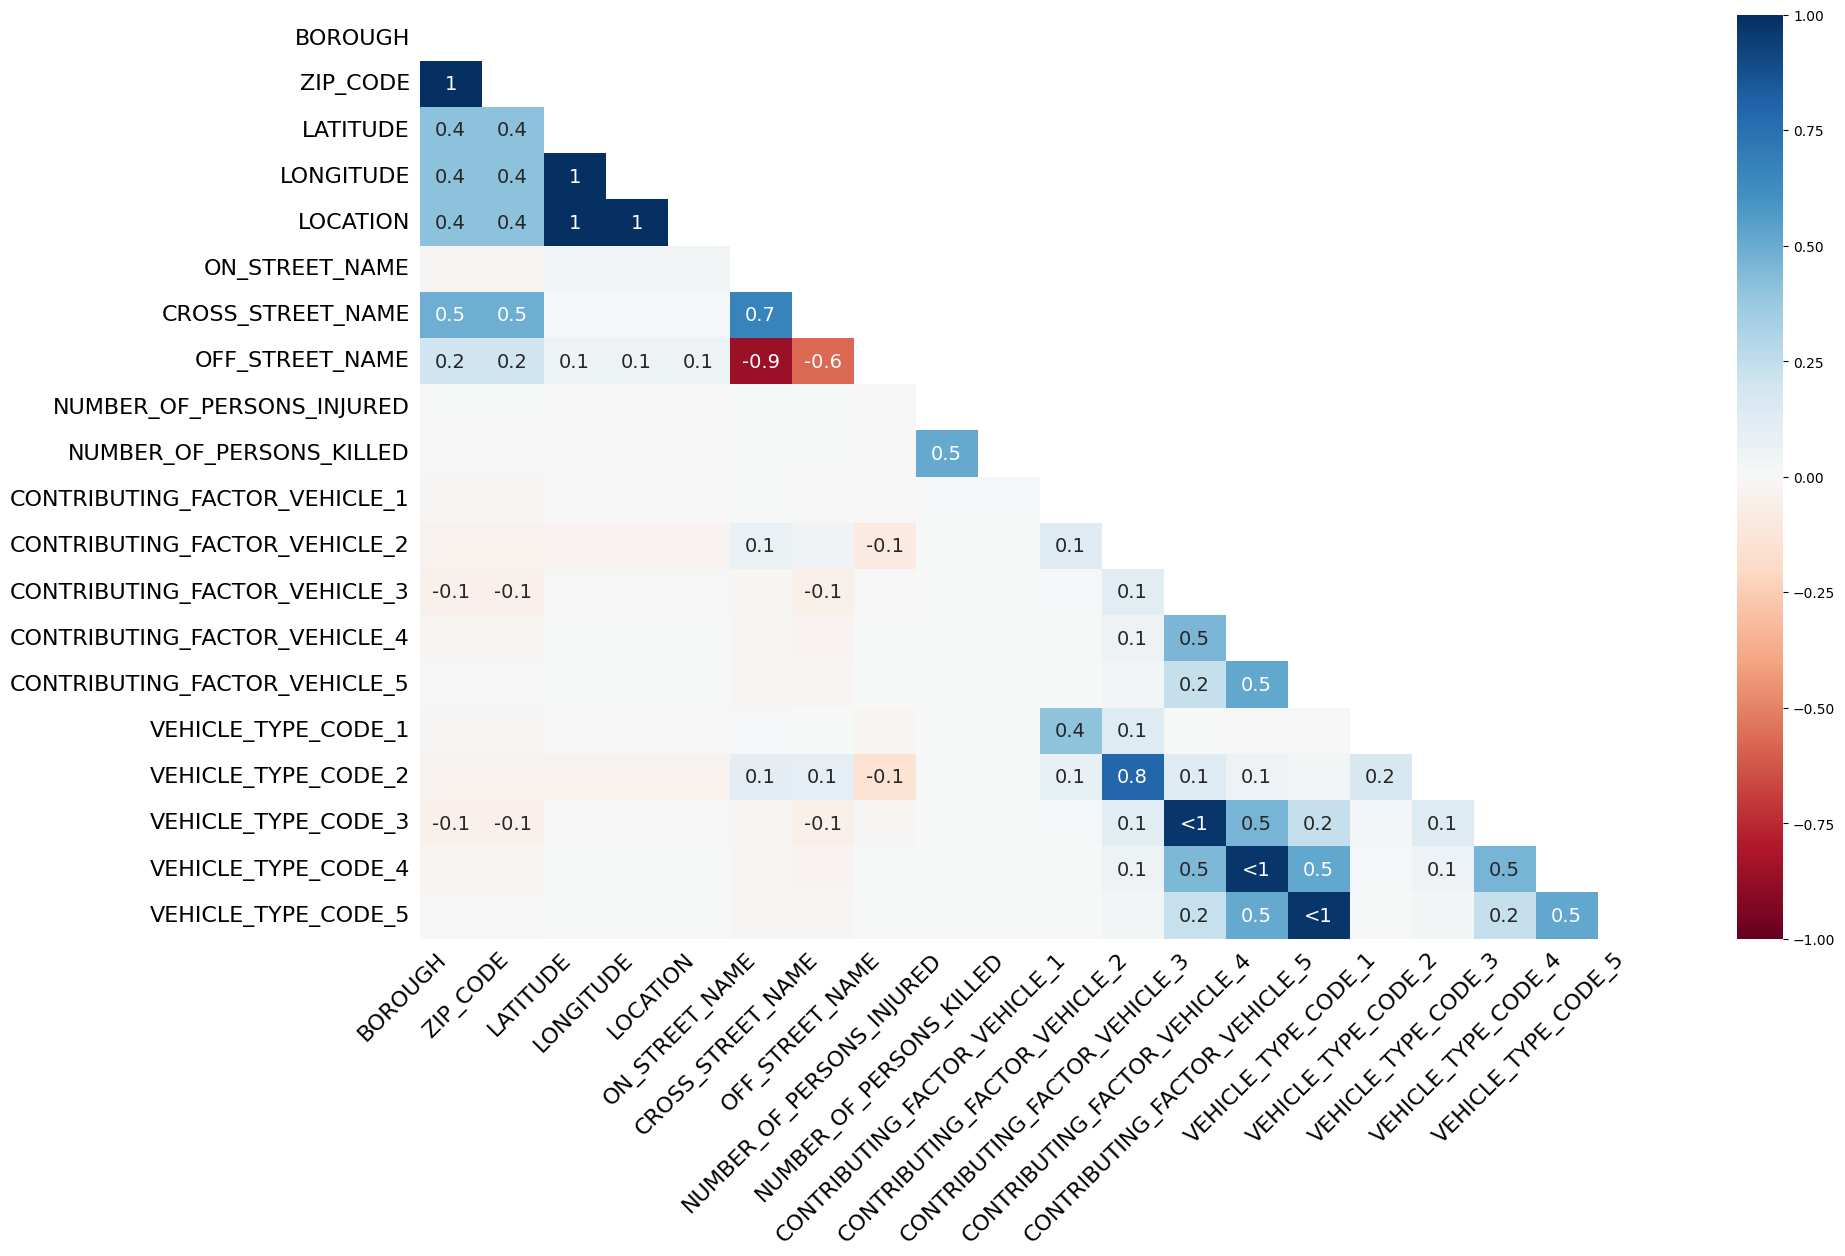

In [18]:
msno.heatmap(collisions)

<Axes: >

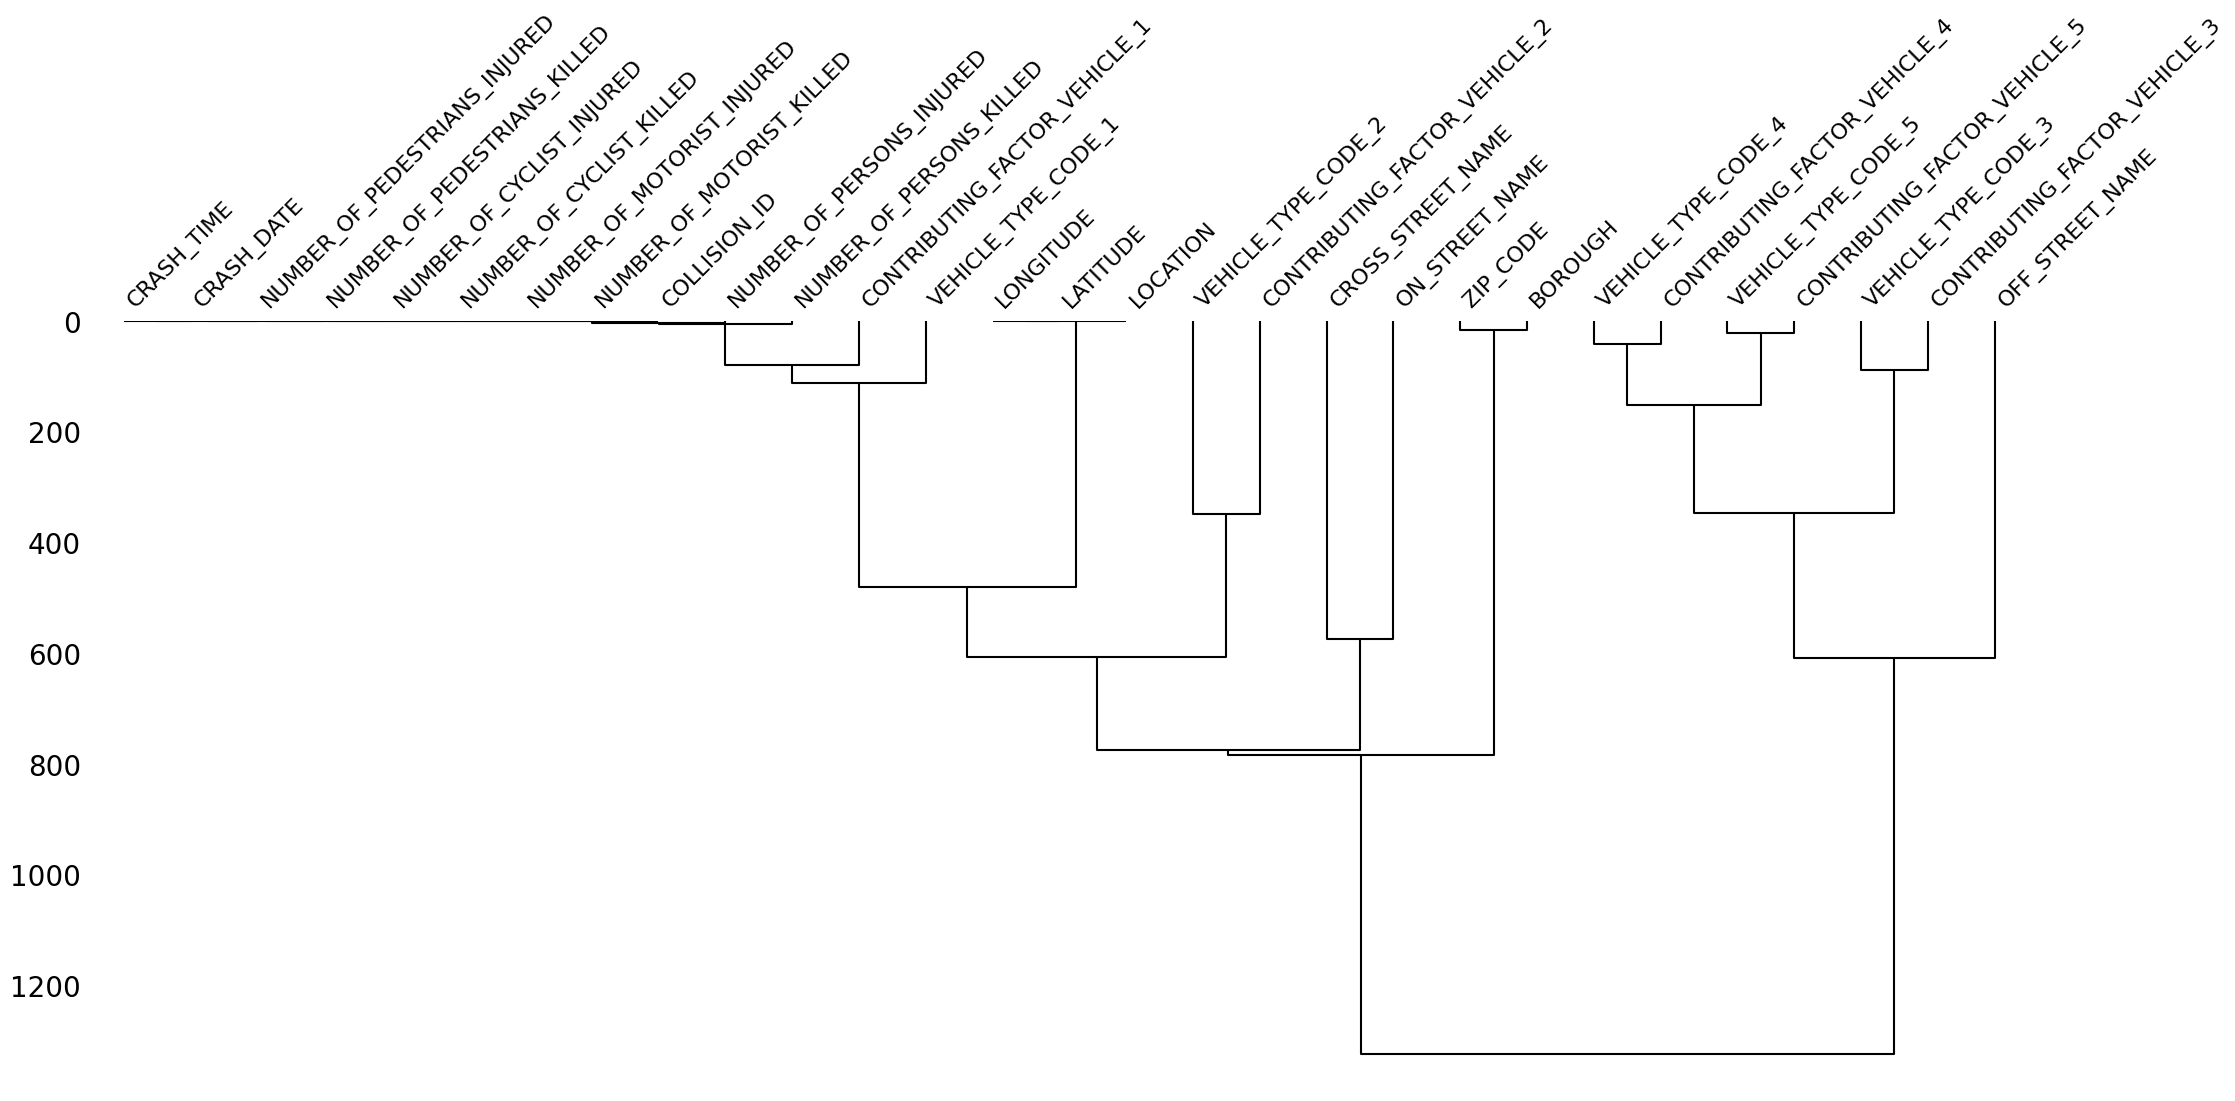

In [19]:
msno.dendrogram(collisions)

In [20]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014469 entries, 0 to 2014468
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH_DATE                     object 
 1   CRASH_TIME                     object 
 2   BOROUGH                        object 
 3   ZIP_CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON_STREET_NAME                 object 
 8   CROSS_STREET_NAME              object 
 9   OFF_STREET_NAME                object 
 10  NUMBER_OF_PERSONS_INJURED      float64
 11  NUMBER_OF_PERSONS_KILLED       float64
 12  NUMBER_OF_PEDESTRIANS_INJURED  int64  
 13  NUMBER_OF_PEDESTRIANS_KILLED   int64  
 14  NUMBER_OF_CYCLIST_INJURED      int64  
 15  NUMBER_OF_CYCLIST_KILLED       int64  
 16  NUMBER_OF_MOTORIST_INJURED     int64  
 17  NUMBER_OF_MOTORIST_KILLED      int64  
 18  CO

In [21]:
collisions.describe().T

count          mean           std  \
LATITUDE                       1785053.0  4.062793e+01  1.979103e+00   
LONGITUDE                      1785053.0 -7.375262e+01  3.724680e+00   
NUMBER_OF_PERSONS_INJURED      2014451.0  3.018798e-01  6.931979e-01   
NUMBER_OF_PERSONS_KILLED       2014438.0  1.440104e-03  3.999828e-02   
NUMBER_OF_PEDESTRIANS_INJURED  2014469.0  5.514456e-02  2.412006e-01   
NUMBER_OF_PEDESTRIANS_KILLED   2014469.0  7.237639e-04  2.738698e-02   
NUMBER_OF_CYCLIST_INJURED      2014469.0  2.605252e-02  1.612121e-01   
NUMBER_OF_CYCLIST_KILLED       2014469.0  1.111956e-04  1.059132e-02   
NUMBER_OF_MOTORIST_INJURED     2014469.0  2.176107e-01  6.544120e-01   
NUMBER_OF_MOTORIST_KILLED      2014469.0  5.862587e-04  2.642165e-02   
COLLISION_ID                   2014469.0  3.113575e+06  1.503933e+06   

                                     min           25%           50%  \
LATITUDE                         0.00000  4.066792e+01  4.072103e+01   
LONGITUDE                     -201.35999 -7.397494e+01 -7.392732e+01   
NUMBER_OF_PERSONS_INJURED        0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_PERSONS_KILLED         0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_PEDESTRIANS_INJURED    0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_PEDESTRIANS_KILLED     0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_CYCLIST_INJURED        0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_CYCLIST_KILLED         0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_MOTORIST_INJURED       0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_MOTORIST_KILLED        0.00000  0.000000e+00  0.000000e+00   
COLLISION_ID                    22.00000  3.139737e+06  3.643457e+06   

                                        75%           max  
LATITUDE                       4.076952e+01  4.334444e+01  
LONGITUDE                     -7.386665e+01  0.000000e+00  
NUMBER_OF_PERSONS_INJURED      0.000000e+00  4.300000e+01  
NUMBER_OF_PERSONS_KILLED       0.000000e+00  8.000000e+00  
NUMBER_OF_PEDESTRIANS_INJURED  0.000000e+00  2.700000e+01  
NUMBER_OF_PEDESTRIANS_KILLED   0.000000e+00  6.000000e+00  
NUMBER_OF_CYCLIST_INJURED      0.000000e+00  4.000000e+00  
NUMBER_OF_CYCLIST_KILLED       0.000000e+00  2.000000e+00  
NUMBER_OF_MOTORIST_INJURED     0.000000e+00  4.300000e+01  
NUMBER_OF_MOTORIST_KILLED      0.000000e+00  5.000000e+00  
COLLISION_ID                   4.147324e+06  4.651279e+06

In [22]:
collisions.info()
#double check that lat long data is listed as numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014469 entries, 0 to 2014468
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH_DATE                     object 
 1   CRASH_TIME                     object 
 2   BOROUGH                        object 
 3   ZIP_CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON_STREET_NAME                 object 
 8   CROSS_STREET_NAME              object 
 9   OFF_STREET_NAME                object 
 10  NUMBER_OF_PERSONS_INJURED      float64
 11  NUMBER_OF_PERSONS_KILLED       float64
 12  NUMBER_OF_PEDESTRIANS_INJURED  int64  
 13  NUMBER_OF_PEDESTRIANS_KILLED   int64  
 14  NUMBER_OF_CYCLIST_INJURED      int64  
 15  NUMBER_OF_CYCLIST_KILLED       int64  
 16  NUMBER_OF_MOTORIST_INJURED     int64  
 17  NUMBER_OF_MOTORIST_KILLED      int64  
 18  CO

In [23]:
import warnings
warnings.filterwarnings('ignore')


Here, .T indicates that we're taking a transpose of the DataFrame to which it is applied, that is, turning the columns into rows and vice versa. Applying it to the describe() function allows us to see the output more easily with each row in the transposed DataFrame now corresponding to the statistics for a single feature.

In [24]:
collisions.describe().T

count          mean           std  \
LATITUDE                       1785053.0  4.062793e+01  1.979103e+00   
LONGITUDE                      1785053.0 -7.375262e+01  3.724680e+00   
NUMBER_OF_PERSONS_INJURED      2014451.0  3.018798e-01  6.931979e-01   
NUMBER_OF_PERSONS_KILLED       2014438.0  1.440104e-03  3.999828e-02   
NUMBER_OF_PEDESTRIANS_INJURED  2014469.0  5.514456e-02  2.412006e-01   
NUMBER_OF_PEDESTRIANS_KILLED   2014469.0  7.237639e-04  2.738698e-02   
NUMBER_OF_CYCLIST_INJURED      2014469.0  2.605252e-02  1.612121e-01   
NUMBER_OF_CYCLIST_KILLED       2014469.0  1.111956e-04  1.059132e-02   
NUMBER_OF_MOTORIST_INJURED     2014469.0  2.176107e-01  6.544120e-01   
NUMBER_OF_MOTORIST_KILLED      2014469.0  5.862587e-04  2.642165e-02   
COLLISION_ID                   2014469.0  3.113575e+06  1.503933e+06   

                                     min           25%           50%  \
LATITUDE                         0.00000  4.066792e+01  4.072103e+01   
LONGITUDE                     -201.35999 -7.397494e+01 -7.392732e+01   
NUMBER_OF_PERSONS_INJURED        0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_PERSONS_KILLED         0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_PEDESTRIANS_INJURED    0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_PEDESTRIANS_KILLED     0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_CYCLIST_INJURED        0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_CYCLIST_KILLED         0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_MOTORIST_INJURED       0.00000  0.000000e+00  0.000000e+00   
NUMBER_OF_MOTORIST_KILLED        0.00000  0.000000e+00  0.000000e+00   
COLLISION_ID                    22.00000  3.139737e+06  3.643457e+06   

                                        75%           max  
LATITUDE                       4.076952e+01  4.334444e+01  
LONGITUDE                     -7.386665e+01  0.000000e+00  
NUMBER_OF_PERSONS_INJURED      0.000000e+00  4.300000e+01  
NUMBER_OF_PERSONS_KILLED       0.000000e+00  8.000000e+00  
NUMBER_OF_PEDESTRIANS_INJURED  0.000000e+00  2.700000e+01  
NUMBER_OF_PEDESTRIANS_KILLED   0.000000e+00  6.000000e+00  
NUMBER_OF_CYCLIST_INJURED      0.000000e+00  4.000000e+00  
NUMBER_OF_CYCLIST_KILLED       0.000000e+00  2.000000e+00  
NUMBER_OF_MOTORIST_INJURED     0.000000e+00  4.300000e+01  
NUMBER_OF_MOTORIST_KILLED      0.000000e+00  5.000000e+00  
COLLISION_ID                   4.147324e+06  4.651279e+06

In [25]:
def summary(collisions):
    
    types = collisions.dtypes
    counts = collisions.apply(lambda x: x.count())
    uniques = collisions.apply(lambda x: [x.unique()])
    nas = collisions.apply(lambda x: x.isnull().sum())
    distincts = collisions.apply(lambda x: x.unique().shape[0])
    missing = (collisions.isnull().sum() / collisions.shape[0]) * 100
    #sk = collisions.skew()
    #krt = collisions.kurt()

In [26]:
print('Data shape:', collisions.shape)

Data shape: (2014469, 29)


In [33]:
details = summary(NYPD)
details

https://www.kaggle.com/alenavorushilova/missing-data-and-nas-guide

In [34]:
for col in NYPD.columns:
    prct = np.mean(NYPD[col].isnull())
    print('{}:{}%'.format(col, round(prct*100)))

CMPLNT_NUM:0%
CMPLNT_FR_DT:0%
CMPLNT_FR_TM:0%
CMPLNT_TO_DT:22%
CMPLNT_TO_TM:22%
ADDR_PCT_CD:0%
RPT_DT:0%
KY_CD:0%
OFNS_DESC:0%
PD_CD:0%
PD_DESC:0%
CRM_ATPT_CPTD_CD:0%
LAW_CAT_CD:0%
BORO_NM:0%
LOC_OF_OCCUR_DESC:21%
PREM_TYP_DESC:1%
JURIS_DESC:0%
JURISDICTION_CODE:0%
PARKS_NM:100%
HADEVELOPT:96%
HOUSING_PSA:92%
X_COORD_CD:0%
Y_COORD_CD:0%
SUSP_AGE_GROUP:62%
SUSP_RACE:45%
SUSP_SEX:47%
TRANSIT_DISTRICT:98%
Latitude:0%
Longitude:0%
Lat_Lon:0%
PATROL_BORO:0%
STATION_NAME:98%
VIC_AGE_GROUP:21%
VIC_RACE:0%
VIC_SEX:0%


In [30]:
for col in collisions.columns:
    prct = np.mean(collisions[col].isnull())
    print('{}:{}%'.format(col, round(prct*100)))

CRASH_DATE:0%
CRASH_TIME:0%
BOROUGH:31%
ZIP_CODE:31%
LATITUDE:11%
LONGITUDE:11%
LOCATION:11%
ON_STREET_NAME:21%
CROSS_STREET_NAME:37%
OFF_STREET_NAME:84%
NUMBER_OF_PERSONS_INJURED:0%
NUMBER_OF_PERSONS_KILLED:0%
NUMBER_OF_PEDESTRIANS_INJURED:0%
NUMBER_OF_PEDESTRIANS_KILLED:0%
NUMBER_OF_CYCLIST_INJURED:0%
NUMBER_OF_CYCLIST_KILLED:0%
NUMBER_OF_MOTORIST_INJURED:0%
NUMBER_OF_MOTORIST_KILLED:0%
CONTRIBUTING_FACTOR_VEHICLE_1:0%
CONTRIBUTING_FACTOR_VEHICLE_2:15%
CONTRIBUTING_FACTOR_VEHICLE_3:93%
CONTRIBUTING_FACTOR_VEHICLE_4:98%
CONTRIBUTING_FACTOR_VEHICLE_5:100%
COLLISION_ID:0%
VEHICLE_TYPE_CODE_1:1%
VEHICLE_TYPE_CODE_2:19%
VEHICLE_TYPE_CODE_3:93%
VEHICLE_TYPE_CODE_4:98%
VEHICLE_TYPE_CODE_5:100%


In [31]:
mask = collisions.isnull()
total = mask.sum()
percent = 100*mask.mean()
missing_collision = pd.concat([total, percent], axis=1,join='outer', \
                         keys=['count_missing', 'perc_missing'])
missing_collision.sort_values(by='perc_missing', ascending=False, \
                         inplace=True)
missing_collision

count_missing  perc_missing
VEHICLE_TYPE_CODE_5                  2006085     99.583811
CONTRIBUTING_FACTOR_VEHICLE_5        2005827     99.571004
VEHICLE_TYPE_CODE_4                  1983513     98.463317
CONTRIBUTING_FACTOR_VEHICLE_4        1982443     98.410201
VEHICLE_TYPE_CODE_3                  1876669     93.159488
CONTRIBUTING_FACTOR_VEHICLE_3        1871702     92.912921
OFF_STREET_NAME                      1683160     83.553532
CROSS_STREET_NAME                     753516     37.405192
ZIP_CODE                              626904     31.120062
BOROUGH                               626666     31.108247
ON_STREET_NAME                        423681     21.031895
VEHICLE_TYPE_CODE_2                   375776     18.653849
CONTRIBUTING_FACTOR_VEHICLE_2         307078     15.243620
LOCATION                              229416     11.388411
LONGITUDE                             229416     11.388411
LATITUDE                              229416     11.388411
VEHICLE_TYPE_CODE_1                    12624      0.626666
CONTRIBUTING_FACTOR_VEHICLE_1           6328      0.314127
NUMBER_OF_PERSONS_KILLED                  31      0.001539
NUMBER_OF_PERSONS_INJURED                 18      0.000894
COLLISION_ID                               0      0.000000
CRASH_DATE                                 0      0.000000
NUMBER_OF_MOTORIST_KILLED                  0      0.000000
NUMBER_OF_MOTORIST_INJURED                 0      0.000000
NUMBER_OF_CYCLIST_KILLED                   0      0.000000
CRASH_TIME                                 0      0.000000
NUMBER_OF_PEDESTRIANS_KILLED               0      0.000000
NUMBER_OF_PEDESTRIANS_INJURED              0      0.000000
NUMBER_OF_CYCLIST_INJURED                  0      0.000000

In [35]:
mask = NYPD.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_NYPD = pd.concat([total, percent], axis=1,join='outer', \
                         keys=['count_missing', 'perc_missing'])
missing_NYPD.sort_values(by='perc_missing', ascending=False, \
                         inplace=True)
missing_NYPD

count_missing  perc_missing
PARKS_NM                 7794644     99.605712
STATION_NAME             7653024     97.795987
TRANSIT_DISTRICT         7653024     97.795987
HADEVELOPT               7477110     95.548028
HOUSING_PSA              7226206     92.341792
SUSP_AGE_GROUP           4883369     62.403292
SUSP_SEX                 3648142     46.618650
SUSP_RACE                3514828     44.915065
CMPLNT_TO_DT             1744294     22.289876
CMPLNT_TO_TM             1739479     22.228346
VIC_AGE_GROUP            1638445     20.937259
LOC_OF_OCCUR_DESC        1618063     20.676803
PREM_TYP_DESC              42015      0.536899
OFNS_DESC                  18832      0.240649
Y_COORD_CD                 17339      0.221571
X_COORD_CD                 17339      0.221571
Lat_Lon                    17339      0.221571
Latitude                   17339      0.221571
Longitude                  17339      0.221571
BORO_NM                    12480      0.159479
PATROL_BORO                 7218      0.092237
PD_DESC                     6761      0.086397
PD_CD                       6761      0.086397
JURISDICTION_CODE           6761      0.086397
ADDR_PCT_CD                 2166      0.027679
CMPLNT_FR_DT                 655      0.008370
VIC_RACE                     390      0.004984
VIC_SEX                      308      0.003936
CRM_ATPT_CPTD_CD             168      0.002147
CMPLNT_FR_TM                  48      0.000613
JURIS_DESC                     0      0.000000
LAW_CAT_CD                     0      0.000000
KY_CD                          0      0.000000
RPT_DT                         0      0.000000
CMPLNT_NUM                     0      0.000000

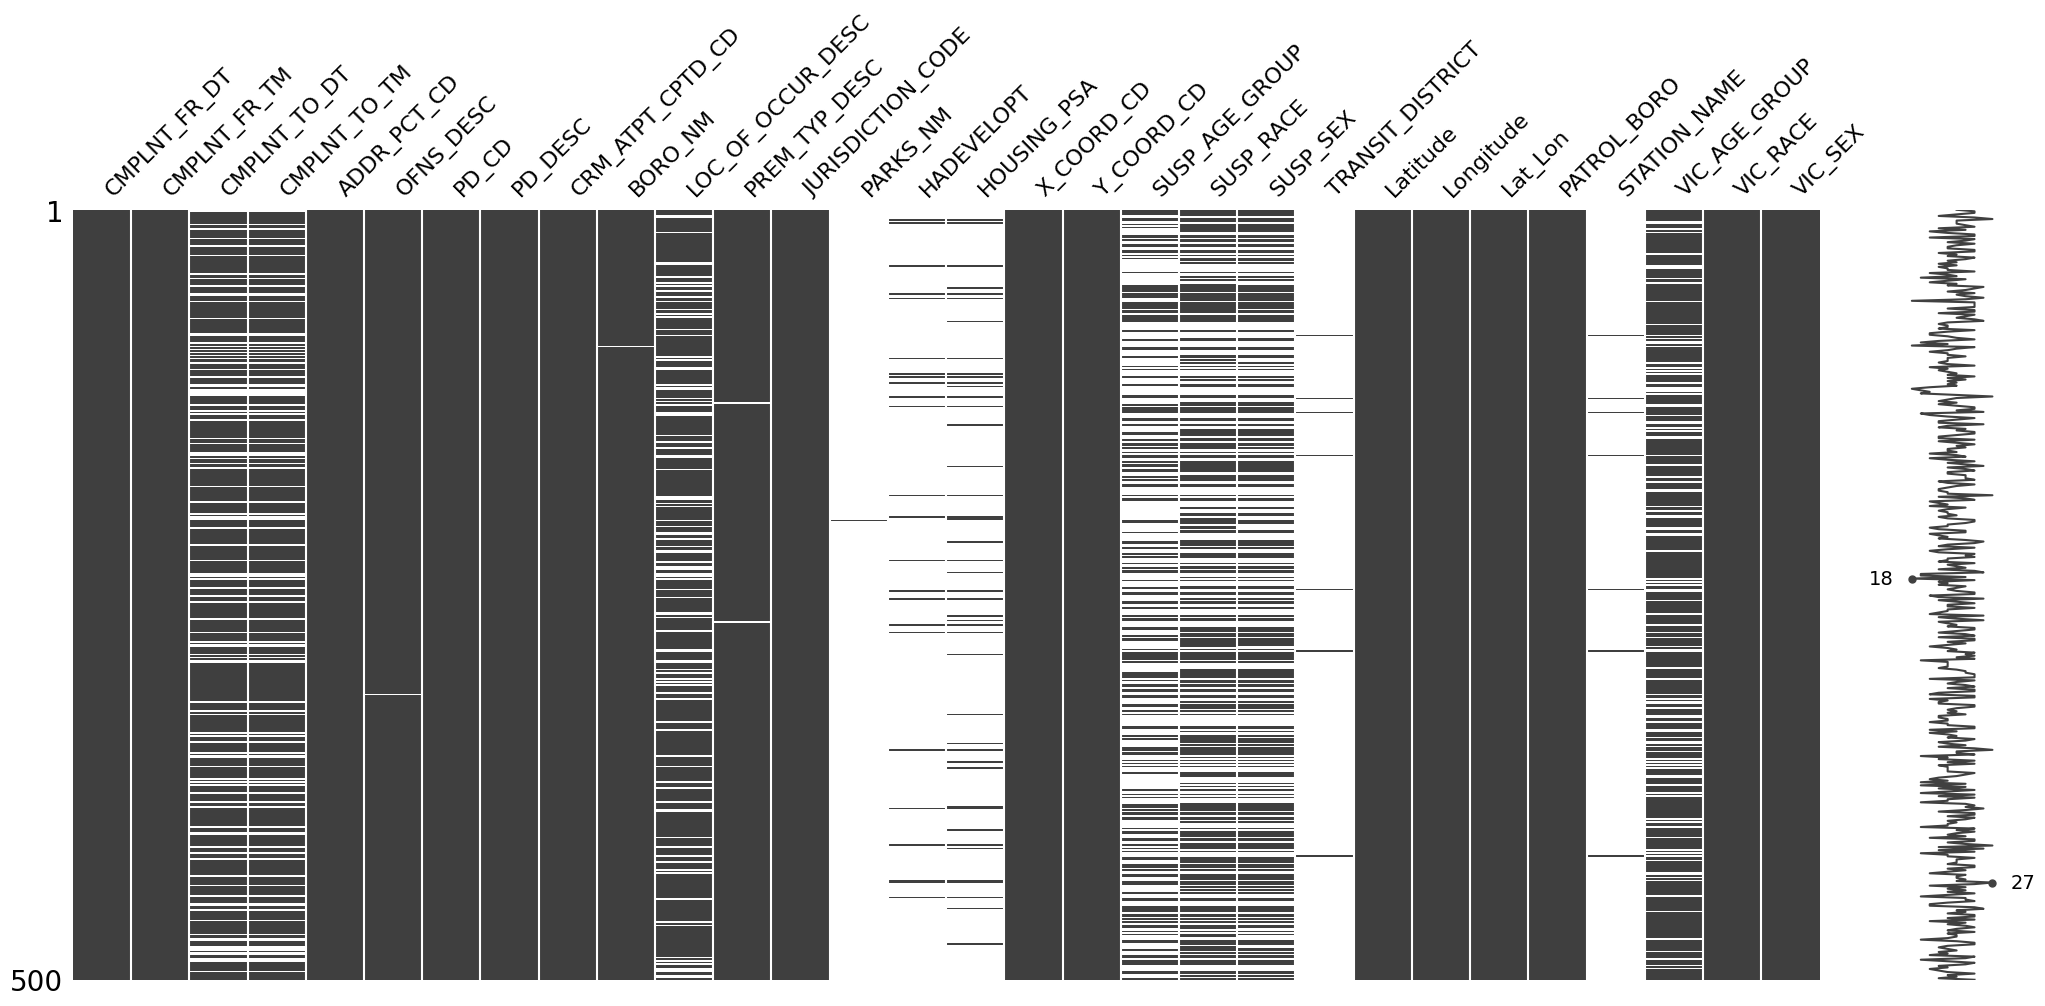

In [36]:
nullable_columns = NYPD.columns[mask.any()].tolist()
msno.matrix(NYPD[nullable_columns].sample(500))
plt.show()

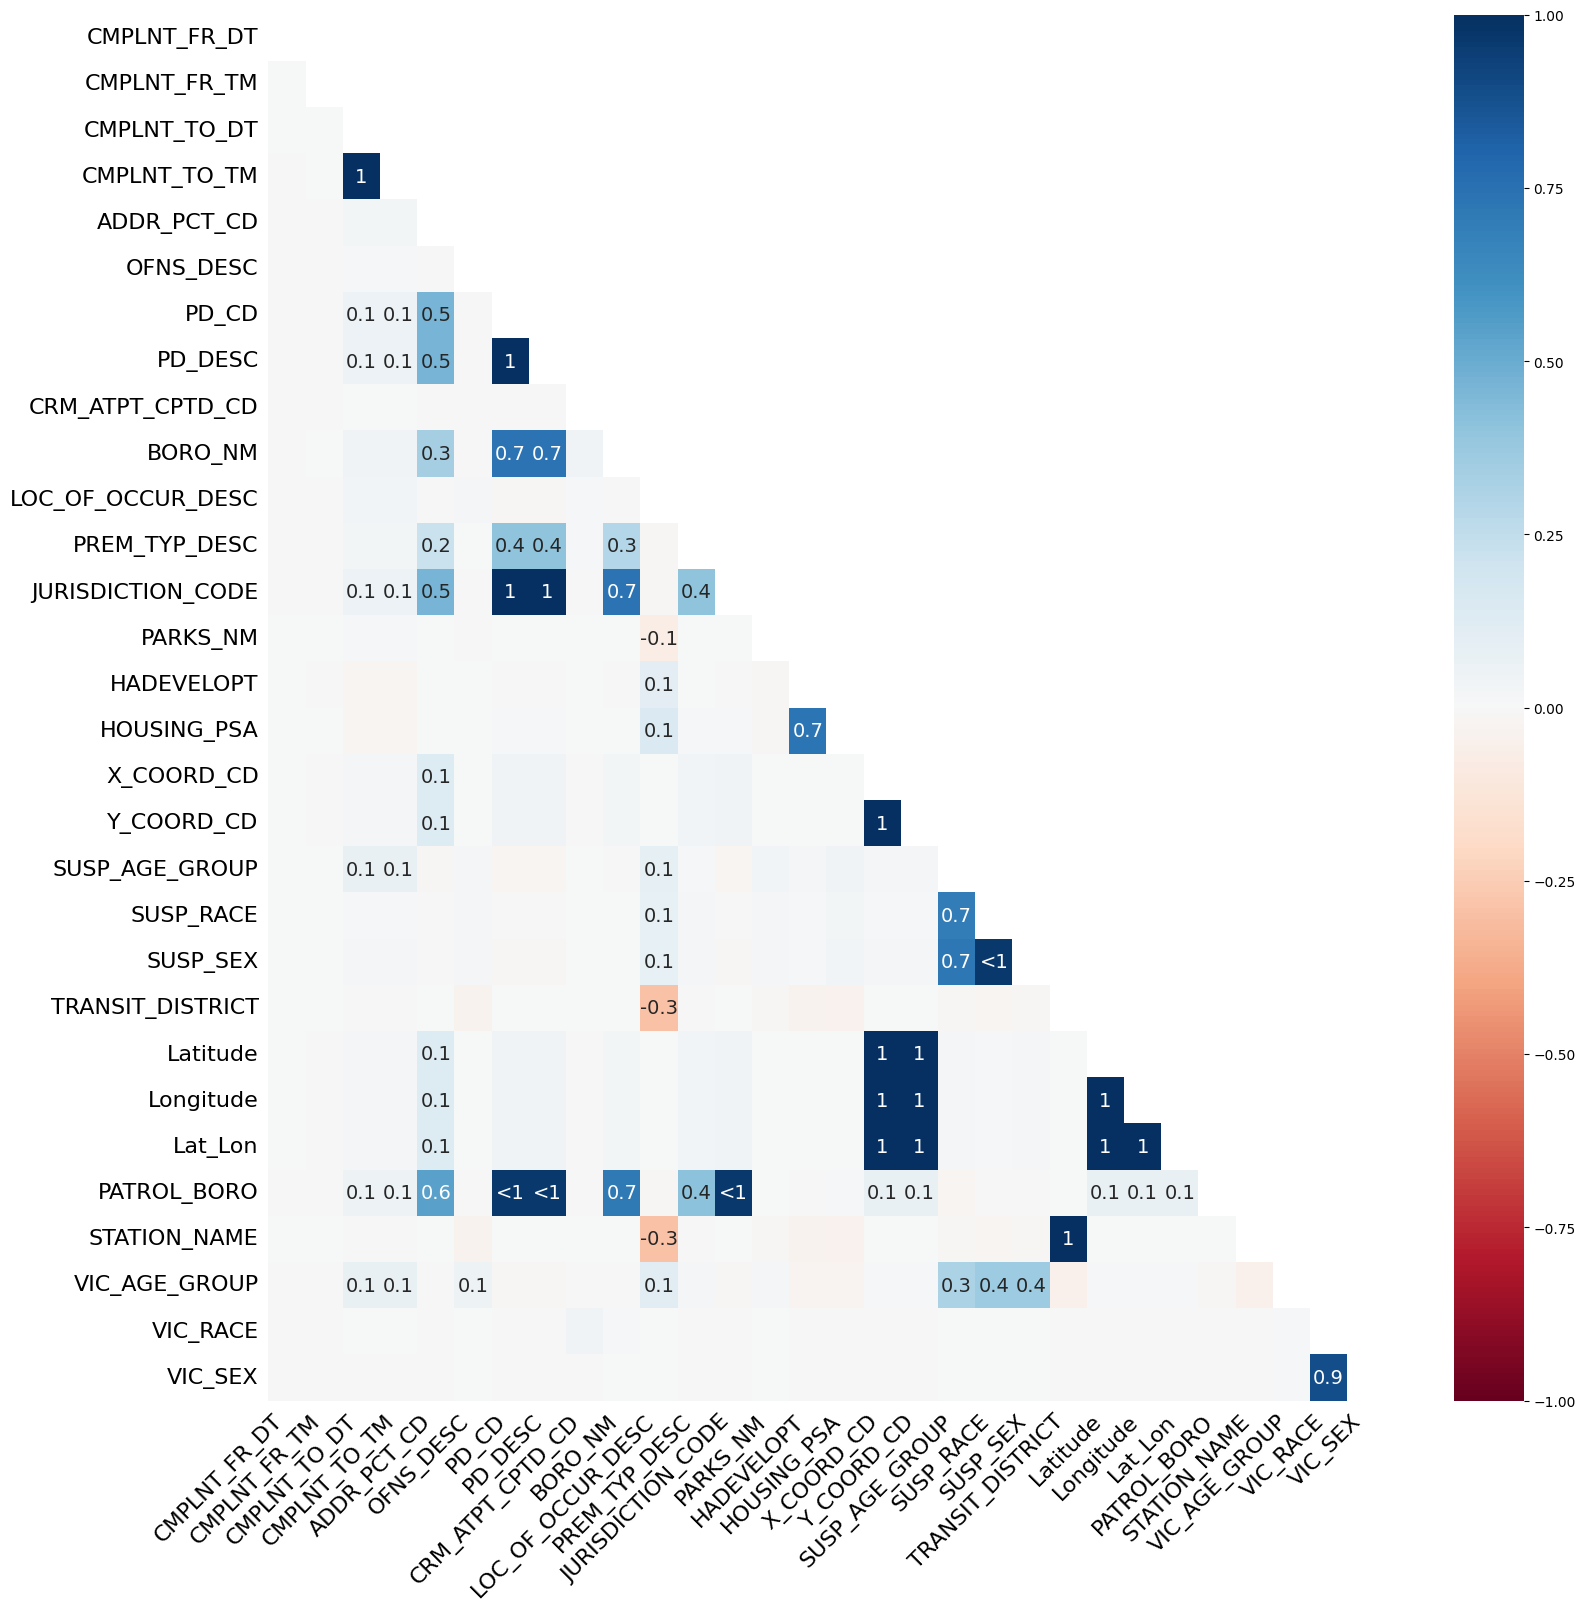

In [37]:
msno.heatmap(NYPD[nullable_columns], figsize=(18,18))
plt.show()

Here, we can also see some boxes labeled <1: this just means that the correlation values in those cases are all close to 1.0, but still not quite perfectly so. We can see a value of <1 between injuries and total_injuries, which means that the missing values in each category are correlated. We would need to dig deeper to understand whether the missing values are correlated because they are based upon the same or similar information, or for some other reason.

http://devguis.com/2-exploratory-data-analysis-and-visualization-the-supervised-learning-workshop.html

.isnull followed by sum will give us a clear way of looking at missing values.

In [38]:
NYPD.isnull().sum()

CMPLNT_NUM                 0
CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1744294
CMPLNT_TO_TM         1739479
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18832
PD_CD                   6761
PD_DESC                 6761
CRM_ATPT_CPTD_CD         168
LAW_CAT_CD                 0
BORO_NM                12480
LOC_OF_OCCUR_DESC    1618063
PREM_TYP_DESC          42015
JURIS_DESC                 0
JURISDICTION_CODE       6761
PARKS_NM             7794644
HADEVELOPT           7477110
HOUSING_PSA          7226206
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4883369
SUSP_RACE            3514828
SUSP_SEX             3648142
TRANSIT_DISTRICT     7653024
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             7218
STATION_NAME         7653024
VIC_AGE_GROUP        1638445
VIC_RACE                 390
VIC_SEX       

In [39]:
collisions.isnull().sum()

CRASH_DATE                             0
CRASH_TIME                             0
BOROUGH                           626666
ZIP_CODE                          626904
LATITUDE                          229416
LONGITUDE                         229416
LOCATION                          229416
ON_STREET_NAME                    423681
CROSS_STREET_NAME                 753516
OFF_STREET_NAME                  1683160
NUMBER_OF_PERSONS_INJURED             18
NUMBER_OF_PERSONS_KILLED              31
NUMBER_OF_PEDESTRIANS_INJURED          0
NUMBER_OF_PEDESTRIANS_KILLED           0
NUMBER_OF_CYCLIST_INJURED              0
NUMBER_OF_CYCLIST_KILLED               0
NUMBER_OF_MOTORIST_INJURED             0
NUMBER_OF_MOTORIST_KILLED              0
CONTRIBUTING_FACTOR_VEHICLE_1       6328
CONTRIBUTING_FACTOR_VEHICLE_2     307078
CONTRIBUTING_FACTOR_VEHICLE_3    1871702
CONTRIBUTING_FACTOR_VEHICLE_4    1982443
CONTRIBUTING_FACTOR_VEHICLE_5    2005827
COLLISION_ID                           0
VEHICLE_TYPE_COD

Here, we can see that the kurtosis values for some variables deviate significantly from 0. This means that these columns have a long tail. But the values that are at the tail end of these variables (which indicate the number of people dead, injured, and the monetary value of damage), in our case, may be outliers that we may need to pay special attention to. Larger values might, in fact, indicate an additional force that added to the devastation caused by an earthquake, that is, a tsunami.

# **Generate Geometry Column**

In [48]:
grouped_collisions = collisions.groupby(['LATITUDE','LONGITUDE',
                             'NUMBER_OF_MOTORIST_INJURED']).size()
grouped_collisions

LATITUDE   LONGITUDE   NUMBER_OF_MOTORIST_INJURED
0.000000    0.000000   0                             3452
                       1                              534
                       2                              152
                       3                               44
                       4                               24
                                                     ... 
41.916610  -79.619550  0                                1
42.107204  -76.021630  0                                1
42.318317  -73.755936  0                                1
42.641540  -79.001830  1                                1
43.344444  -76.263400  0                                1
Length: 377744, dtype: int64

In [49]:
collisions_gdf = gpd.GeoDataFrame(collisions)

In [50]:
mappable_gdf = gpd.GeoDataFrame(collisions)

In [51]:
mappable_gdf = gpd.GeoDataFrame(grouped_collisions)

In [52]:
mappable_gdf

0
LATITUDE  LONGITUDE  NUMBER_OF_MOTORIST_INJURED      
0.000000   0.000000  0                           3452
                     1                            534
                     2                            152
                     3                             44
                     4                             24
...                                               ...
41.916610 -79.619550 0                              1
42.107204 -76.021630 0                              1
42.318317 -73.755936 0                              1
42.641540 -79.001830 1                              1
43.344444 -76.263400 0                              1

[377744 rows x 1 columns]

In [53]:
mappable_gdf.sort_values(by=['LATITUDE','LONGITUDE'])

0
LATITUDE  LONGITUDE  NUMBER_OF_MOTORIST_INJURED      
0.000000   0.000000  0                           3452
                     1                            534
                     2                            152
                     3                             44
                     4                             24
...                                               ...
41.916610 -79.619550 0                              1
42.107204 -76.021630 0                              1
42.318317 -73.755936 0                              1
42.641540 -79.001830 1                              1
43.344444 -76.263400 0                              1

[377744 rows x 1 columns]

In [54]:
type(mappable_gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
collisions

BoroCode   BoroName     Shape_Leng    Shape_Area  \
3         1  Manhattan  359299.096471  6.364715e+08   

                                            geometry  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....

In [ ]:
!pip install fiona
import fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
collisions_gdf.to_file('NYC_Collisions.geojson', driver='GeoJSON')

In [58]:
!pip install sweetviz

     ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
     - -------------------------------------- 0.4/15.1 MB 12.5 MB/s eta 0:00:02
     -- ------------------------------------- 0.9/15.1 MB 11.9 MB/s eta 0:00:02
     -- ------------------------------------- 1.0/15.1 MB 11.0 MB/s eta 0:00:02
     --- ------------------------------------ 1.5/15.1 MB 8.6 MB/s eta 0:00:02
     ----- ---------------------------------- 2.0/15.1 MB 9.3 MB/s eta 0:00:02
     ------ --------------------------------- 2.6/15.1 MB 9.6 MB/s eta 0:00:02
     -------- ------------------------------- 3.1/15.1 MB 10.0 MB/s eta 0:00:02
     --------- ------------------------------ 3.7/15.1 MB 10.2 MB/s eta 0:00:02
     ----------- ---------------------------- 4.2/15.1 MB 10.3 MB/s eta 0:00:02
     ------------ --------------------------- 4.7/15.1 MB 10.4 MB/s eta 0:00:02
     ------------- -------------------------- 5.2/15.1 MB 10.5 MB/s eta 0:00:01
     --------------- ------------------------ 5.8/1

In [59]:
import sweetviz as sv
df=pd.read_csv('./content/Motor_Vehicle_Collisions_-_Crashes.csv')

In [60]:
df

CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0        09/11/2021       2:39        NaN      NaN        NaN        NaN   
1        03/26/2022      11:45        NaN      NaN        NaN        NaN   
2        06/29/2022       6:55        NaN      NaN        NaN        NaN   
3        09/11/2021       9:35   BROOKLYN  11208.0  40.667202 -73.866500   
4        12/14/2021       8:13   BROOKLYN  11233.0  40.683304 -73.917274   
...             ...        ...        ...      ...        ...        ...   
2014464  07/03/2023      18:05        NaN      NaN  40.866806 -73.931010   
2014465  07/22/2023      21:39      BRONX  10457.0  40.844177 -73.902920   
2014466  07/02/2023      17:55  MANHATTAN  10006.0  40.711033 -74.014540   
2014467  07/22/2023      13:15     QUEENS  11433.0  40.691580 -73.793190   
2014468  07/22/2023       3:00     QUEENS  11433.0  40.700240 -73.792854   

                        LOCATION           ON STREET NAME CROSS STREET NAME  \
0                            NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                            NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                            NaN       THROGS NECK BRIDGE               NaN   
3          (40.667202, -73.8665)                      NaN               NaN   
4        (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   
...                          ...                      ...               ...   
2014464   (40.866806, -73.93101)          RIVERSIDE DRIVE               NaN   
2014465   (40.844177, -73.90292)          EAST 174 STREET    WEBSTER AVENUE   
2014466   (40.711033, -74.01454)              WEST STREET    LIBERTY STREET   
2014467    (40.69158, -73.79319)               110 AVENUE        157 STREET   
2014468   (40.70024, -73.792854)               SOUTH ROAD        164 STREET   

                 OFF STREET NAME  ...   CONTRIBUTING FACTOR VEHICLE 2  \
0                            NaN  ...                     Unspecified   
1                            NaN  ...                             NaN   
2                            NaN  ...                     Unspecified   
3        1211      LORING AVENUE  ...                             NaN   
4                            NaN  ...                             NaN   
...                          ...  ...                             ...   
2014464                      NaN  ...                     Unspecified   
2014465                      NaN  ...                             NaN   
2014466                      NaN  ...                             NaN   
2014467                      NaN  ...  Driver Inattention/Distraction   
2014468                      NaN  ...                             NaN   

         CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                                  NaN                            NaN   
1                                  NaN                            NaN   
2                                  NaN                            NaN   
3                                  NaN                            NaN   
4                                  NaN                            NaN   
...                                ...                            ...   
2014464                            NaN                            NaN   
2014465                            NaN                            NaN   
2014466                            NaN                            NaN   
2014467                            NaN                            NaN   
2014468                            NaN                            NaN   

         CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  \
0                                  NaN       4455765   
1                                  NaN       4513547   
2                                  NaN       4541903   
3                                  NaN       4456314   
4                                  NaN       4486609   
...                                ...           ...   
2

In [61]:
df['ZIP CODE'] = df['ZIP CODE'].astype(str)